# Notebook to explore neutrino scattering (electron and muon flavor) and measure g_1, g_2, and sin^(theta_w)

In [1]:
from muon_collider_mc import *
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

from matplotlib.pylab import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

### Setup the muon ring parameters and detector dimensions

* Muon energy: 1.5e6 MeV or 1.5 TeV
* Detector distance: 200.0 meters
* N_muons: 2.16e20 in 1 year

In [2]:
event_gen = NeutronFluxMuonRing(Emu=1.5e6, ring_radius=1000.0, N_muons=2.16e20, det_dist=200.0,
                                det_area=25.0, det_length=10.0, det_mat=Material("Ar"))

### Plot the electron recoil spectrum with the default value of Sin^2(theta_w)

In [4]:
# 100 MeV threshold up to 100 GeV
er_bins = np.linspace(1e2, 1e6, 50)
er_centers = (er_bins[1:] + er_bins[:-1])/2

mu_weights, e_weights = event_gen.eves_event_rate(er_bins, n_subsamples=500)

100%|██████████| 49/49 [00:26<00:00,  1.82it/s]


### vs weighted MC method

In [5]:
event_gen.eves_weighted_mc_sim(er_bins, n_samples=500000, n_subsamples=20)

100%|██████████| 500000/500000 [00:52<00:00, 9543.37it/s] 


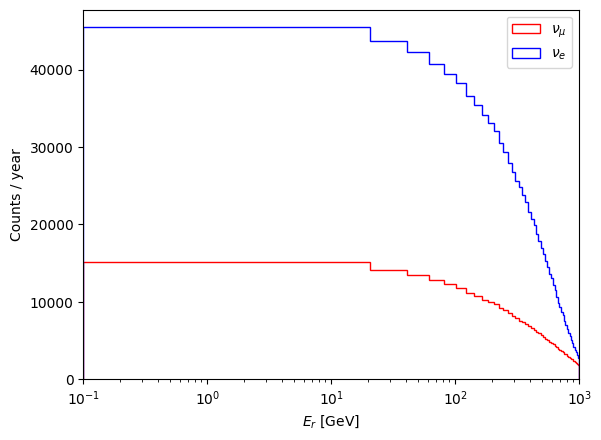

In [6]:

plt.hist(1e-3*er_centers, weights=mu_weights, bins=1e-3*er_bins, color='r', label=r"$\nu_\mu$", histtype='step')
plt.hist(1e-3*er_centers, weights=e_weights, bins=1e-3*er_bins, color='b', label=r"$\nu_e$", histtype='step')
#plt.hist(1e-3*np.array(event_gen.el_energies), weights=event_gen.el_weights_numu, bins=1e-3*er_bins,
#         label=r"$\nu_\mu$", histtype='step', ls='dashed', color='r')
#plt.hist(1e-3*np.array(event_gen.el_energies), weights=event_gen.el_weights_nue, bins=1e-3*er_bins,
#         label=r"$\nu_e$", histtype='step', ls='dashed', color='b')
plt.xlim((er_bins[0]*1e-3, 1e-3*er_bins[-1]))
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel(r"$E_r$ [GeV]")
plt.ylabel("Counts / year")
plt.show()

In [1]:
plt.hist(1e-3*er_centers, weights=mu_weights, bins=1e-3*er_bins, color='r', label=r"$\nu_\mu$", histtype='step', density=True)
plt.hist(1e-3*er_centers, weights=e_weights, bins=1e-3*er_bins, color='b', label=r"$\nu_e$", histtype='step', density=True)
plt.hist(1e-3*np.array(event_gen.el_energies), weights=event_gen.el_weights_numu, bins=1e-3*er_bins, histtype='step',
         ls='dashed', color='r', density=True)
plt.hist(1e-3*np.array(event_gen.el_energies), weights=event_gen.el_weights_nue, bins=1e-3*er_bins, histtype='step',
         ls='dashed', color='b', density=True)
plt.xlim((er_bins[0]*1e-3, 1e-3*er_bins[-1]))
plt.legend()
plt.xlabel(r"$E_r$ [GeV]")
plt.ylabel("a.u.")
plt.yscale('log')
plt.show()

NameError: name 'plt' is not defined

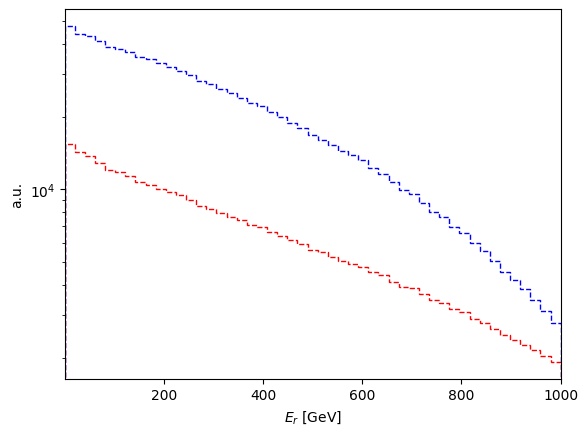

In [8]:
#plt.hist(1e-3*er_centers, weights=mu_weights, bins=1e-3*er_bins, color='r', label="$\nu_\mu$", histtype='step', density=True)
#plt.hist(1e-3*er_centers, weights=e_weights, bins=1e-3*er_bins, color='b', label="$\nu_e$", histtype='step', density=True)
plt.hist(1e-3*np.array(event_gen.el_energies), weights=event_gen.el_weights_numu, bins=1e-3*er_bins, histtype='step', ls='dashed', color='r')
plt.hist(1e-3*np.array(event_gen.el_energies), weights=event_gen.el_weights_nue, bins=1e-3*er_bins, histtype='step', ls='dashed', color='b')
plt.xlim((er_bins[0]*1e-3, 1e-3*er_bins[-1]))
plt.xlabel(r"$E_r$ [GeV]")
plt.ylabel("a.u.")
plt.yscale('log')
plt.show()

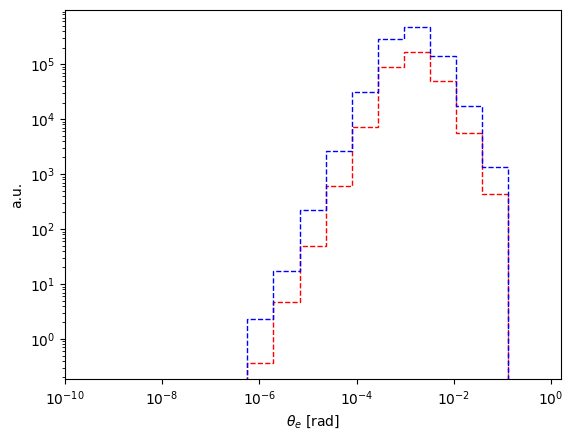

In [9]:
theta_bins = np.logspace(-10, np.log10(pi/2), 20)
plt.hist(np.array(event_gen.el_thetas), weights=event_gen.el_weights_numu, bins=theta_bins, histtype='step', ls='dashed', color='r')
plt.hist(np.array(event_gen.el_thetas), weights=event_gen.el_weights_nue, bins=theta_bins, histtype='step', ls='dashed', color='b')
plt.xlim((theta_bins[0], theta_bins[-1]))
plt.xscale('log')
plt.xlabel(r"$\theta_{e}$ [rad]")
plt.ylabel("a.u.")
plt.yscale('log')
plt.show()

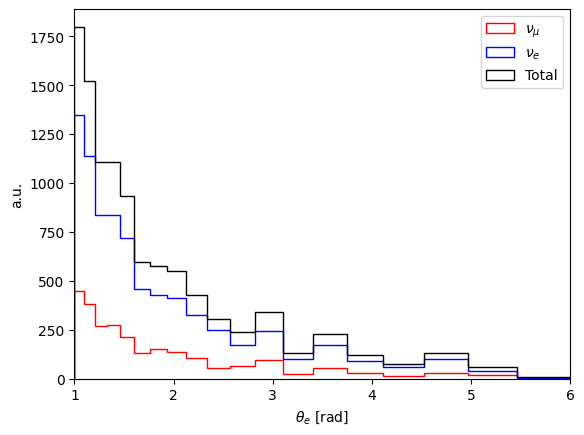

In [10]:
theta_bins = np.logspace(0, np.log10(6.0), 20)
rad2deg = 180.0/np.pi
plt.hist(rad2deg*np.array(event_gen.el_thetas), weights=event_gen.el_weights_numu, bins=theta_bins,
         label=r"$\nu_\mu$", histtype='step', color='r')
plt.hist(rad2deg*np.array(event_gen.el_thetas), weights=event_gen.el_weights_nue, bins=theta_bins,
         label=r"$\nu_e$", histtype='step', color='b')
total_weights = np.array(event_gen.el_weights_nue) + np.array(event_gen.el_weights_numu)
plt.hist(rad2deg*np.array(event_gen.el_thetas), weights=total_weights, bins=theta_bins,
         label=r"Total", histtype='step', color='k')
plt.xlim((theta_bins[0], theta_bins[-1]))
#plt.xscale('log')
plt.xlabel(r"$\theta_{e}$ [rad]")
plt.ylabel("a.u.")
plt.legend()
#plt.yscale('log')
plt.show()

# Using Precalculated Fluxes with Running

In [5]:
# NEW FLUXES
numu_flux_500GeV = np.genfromtxt("data/numu_energy_flux_MeV_SqrtS-500GeV_1e19nu.txt")
nue_flux_500GeV = np.genfromtxt("data/nuebar_energy_flux_MeV_SqrtS-500GeV_7e18nu.txt")

numu_flux_3TeV = np.genfromtxt("data/numu_energy_flux_MeV_SqrtS-3TeV_1e19nu.txt")
nue_flux_3TeV = np.genfromtxt("data/nuebar_energy_flux_MeV_SqrtS-3TeV_7e18nu.txt")

numu_flux_10TeV = np.genfromtxt("data/numu_energy_flux_MeV_SqrtS-10TeV_11e18nu.txt")
nue_flux_10TeV = np.genfromtxt("data/nuebar_energy_flux_MeV_SqrtS-10TeV_7e18nu.txt")

In [6]:
# sqrt(s) = 10 TeV - WITH RUNNING
N_SAMPLES = 500

eves_gen_nuebar_10TeV_running = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True, energy_only_flux=True)
eves_gen_numu_10TeV_running = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True, energy_only_flux=True)
eves_gen_nuebar_10TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_10TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_10TeV_running, nuebar_theta_10TeV_running, _, nuebar_wgts_10TeV_running = eves_gen_nuebar_10TeV_running.get_energy_theta_phi_wgt_arrays()
numu_energies_10TeV_running, numu_theta_10TeV_running, _, numu_wgts_10TeV_running = eves_gen_numu_10TeV_running.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_10TeV_running = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True, energy_only_flux=True)
eves_gen_numubar_10TeV_running = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True, energy_only_flux=True)
eves_gen_nue_10TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numubar_10TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nue_energies_10TeV_running, nue_theta_10TeV_running, _, nue_wgts_10TeV_running = eves_gen_nue_10TeV_running.get_energy_theta_phi_wgt_arrays()
numubar_energies_10TeV_running, numubar_theta_10TeV_running, _, numubar_wgts_10TeV_running = eves_gen_numubar_10TeV_running.get_energy_theta_phi_wgt_arrays()

In [7]:
print("TOTAL nuebar events = ", np.sum(nuebar_wgts_10TeV_running))
print("TOTAL numu events = ", np.sum(numu_wgts_10TeV_running))
print("TOTAL nue events = ", np.sum(nue_wgts_10TeV_running))
print("TOTAL numubar events = ", np.sum(numubar_wgts_10TeV_running))

TOTAL nuebar events =  884443.6503604332
TOTAL numu events =  706045.1743344399
TOTAL nue events =  2093406.5855637484
TOTAL numubar events =  632499.4109147028


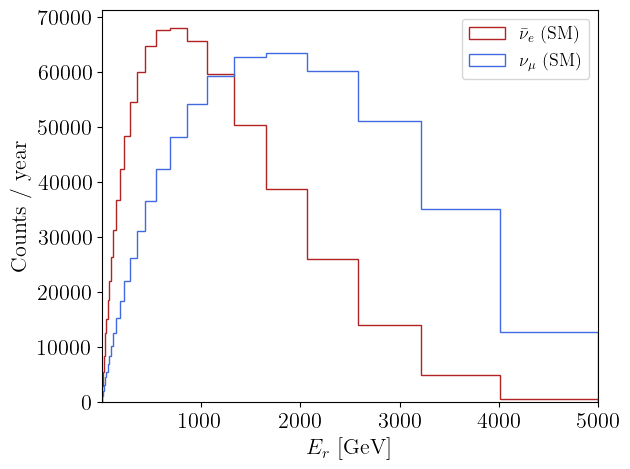

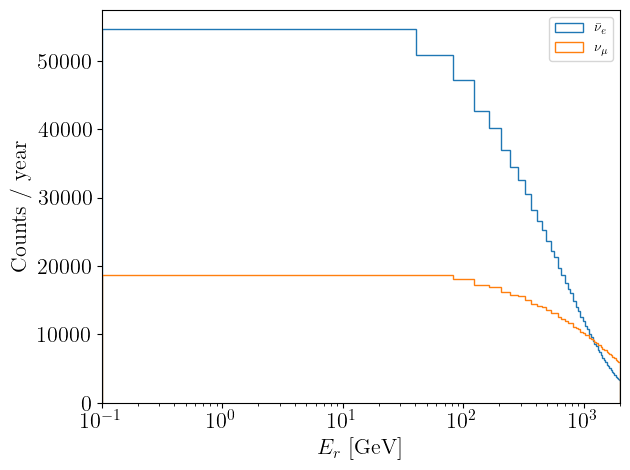

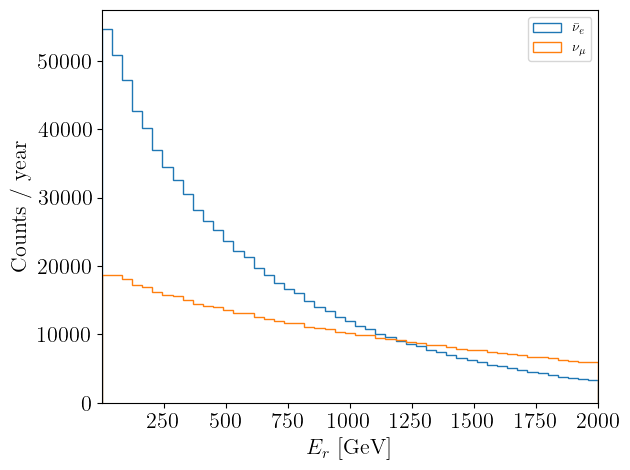

In [8]:
er_bins = np.logspace(-1, np.log10(5000), 50)  # GeV

plt.hist(1e-3*nuebar_energies_10TeV_running, weights=nuebar_wgts_10TeV_running, bins=er_bins, histtype='step',
         label=r"$\bar{\nu}_e$ (SM)", color='firebrick')
plt.hist(1e-3*numu_energies_10TeV_running, weights=numu_wgts_10TeV_running, bins=er_bins, histtype='step',
         label=r"$\nu_\mu$ (SM)", color='royalblue')

plt.legend(fontsize=13)
plt.xlabel(r"$E_r$ [GeV]", fontsize=16)
plt.ylabel("Counts / year", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlim((er_bins[0], er_bins[-1]))
plt.tight_layout()
plt.savefig("plots/mu_minus_decay_EvES_energy_spectrum.pdf")
plt.show()

er_bins = np.linspace(1e-1, 2e3, 50)
plt.hist(1e-3*nuebar_energies_10TeV_running, weights=nuebar_wgts_10TeV_running, bins=er_bins, histtype='step', label=r"$\bar{\nu}_e$")
plt.hist(1e-3*numu_energies_10TeV_running, weights=numu_wgts_10TeV_running, bins=er_bins, histtype='step', label=r"$\nu_\mu$")
plt.xscale('log')
plt.xlabel(r"$E_r$ [GeV]", fontsize=16)
plt.ylabel("Counts / year", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlim((er_bins[0], er_bins[-1]))
plt.legend()
plt.tight_layout()
plt.show()

plt.hist(1e-3*nuebar_energies_10TeV_running, weights=nuebar_wgts_10TeV_running, bins=er_bins, histtype='step', label=r"$\bar{\nu}_e$")
plt.hist(1e-3*numu_energies_10TeV_running, weights=numu_wgts_10TeV_running, bins=er_bins, histtype='step', label=r"$\nu_\mu$")
plt.xlabel(r"$E_r$ [GeV]", fontsize=16)
plt.ylabel("Counts / year", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlim((er_bins[0], er_bins[-1]))
plt.legend()
plt.tight_layout()
plt.show()

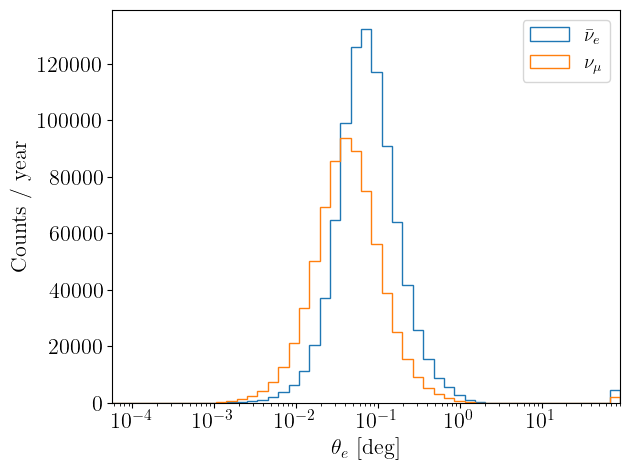

In [9]:
rad2deg = 180.0/np.pi

# log bins
theta_bins = rad2deg*np.logspace(-6, np.log10(pi/2), 50)

plt.hist(rad2deg*nuebar_theta_10TeV_running, weights=nuebar_wgts_10TeV_running, bins=theta_bins, histtype='step', label=r"$\bar{\nu}_e$")
plt.hist(rad2deg*numu_theta_10TeV_running, weights=numu_wgts_10TeV_running, bins=theta_bins, histtype='step', label=r"$\nu_\mu$")
plt.legend(fontsize=14)
plt.xscale('log')
plt.xlabel(r"$\theta_e$ [deg]", fontsize=16)
plt.ylabel("Counts / year", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlim((theta_bins[0], theta_bins[-1]))
plt.tight_layout()
plt.show()



### 2d Plots and the CCQE line

d:\Python\Python39\lib\site-packages\numpy\core\function_base.py:298: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


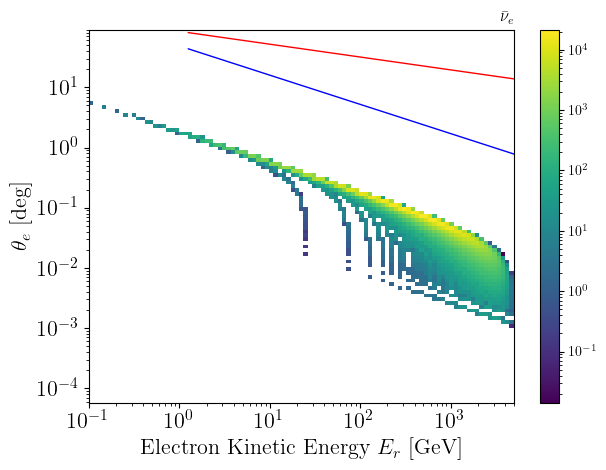

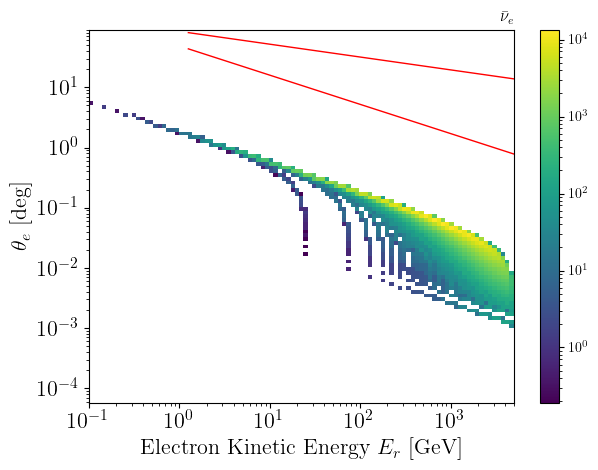

In [14]:
er_bins_2d = np.logspace(-1, np.log10(5000), 100)  # FeV
theta_bins_2d = rad2deg*np.logspace(-6, np.log10(pi/2), 100)

# get line where Ee theta_e^2 = 2 me
Ee_vals = np.logspace(er_bins_2d[0], er_bins_2d[-1], 1000)
theta_e_vals = rad2deg*sqrt(2*M_E/(Ee_vals+M_E))  # adjusted for KE -> total energy

# Line for CC
theta_e_vals_cc = rad2deg*sqrt(2*M_P/(Ee_vals+M_P))  # adjusted for KE -> total energy

plt.hist2d(1e-3*nuebar_energies_10TeV_running, rad2deg*nuebar_theta_10TeV_running, weights=nuebar_wgts_10TeV_running, bins=[er_bins_2d, theta_bins_2d], norm=LogNorm())
plt.plot(Ee_vals, theta_e_vals, color='b', linewidth=1.0)
plt.plot(Ee_vals, theta_e_vals_cc, color='r', linewidth=1.0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"Electron Kinetic Energy $E_r$ [GeV]", fontsize=16)
plt.ylabel(r"$\theta_e$ [deg]", fontsize=16)
plt.title(r"$\bar{\nu}_e$", fontsize=12, loc="right")
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.colorbar()
plt.xlim((er_bins_2d[0], er_bins_2d[-1]))
plt.ylim((theta_bins_2d[0], theta_bins_2d[-1]))
plt.tight_layout()
plt.show()

plt.hist2d(1e-3*numu_energies_10TeV_running, rad2deg*numu_theta_10TeV_running, weights=numu_wgts_10TeV_running, bins=[er_bins_2d, theta_bins_2d], norm=LogNorm())
plt.plot(Ee_vals, theta_e_vals, color='r', linewidth=1.0)
plt.plot(Ee_vals, theta_e_vals_cc, color='r', linewidth=1.0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"Electron Kinetic Energy $E_r$ [GeV]", fontsize=16)
plt.ylabel(r"$\theta_e$ [deg]", fontsize=16)
plt.title(r"$\bar{\nu}_e$", fontsize=12, loc="right")
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.colorbar()
plt.xlim((er_bins_2d[0], er_bins_2d[-1]))
plt.ylim((theta_bins_2d[0], theta_bins_2d[-1]))
plt.tight_layout()
plt.show()

### Check CCQE kinematics

In [30]:
ccqe_event = NeutrinoNucleonCCQE(flavor="e")

e_lep_cc, theta_lep_cc, wgt_cc = ccqe_event.rates(ev=1000000.0, n_samples=100000)

dsigma =  [1.81172887e-31 9.87599953e-31 7.42685777e-29 ... 3.53857223e-31
 1.28170165e-29 1.92374860e-29]


d:\Python\Python39\lib\site-packages\numpy\core\function_base.py:298: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


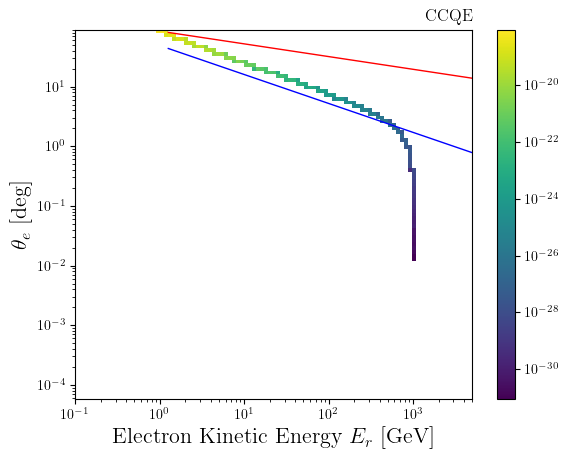

In [36]:
er_bins_2d = np.logspace(-1, np.log10(5000), 100)  # FeV
theta_bins_2d = rad2deg*np.logspace(-6, np.log10(pi/2), 100)

Ee_vals = np.logspace(er_bins_2d[0], er_bins_2d[-1], 1000)
theta_e_vals = rad2deg*sqrt(2*M_E/(Ee_vals+M_E))  # adjusted for KE -> total energy
theta_e_vals_cc = rad2deg*sqrt(2*M_P/(Ee_vals+M_P))  # adjusted for KE -> total energy
plt.plot(Ee_vals, theta_e_vals, color='b', linewidth=1.0)
plt.plot(Ee_vals, theta_e_vals_cc, color='r', linewidth=1.0)

plt.hist2d(1e-3*e_lep_cc, theta_lep_cc*rad2deg, weights=wgt_cc, bins=[er_bins_2d, theta_bins_2d], norm=LogNorm())

plt.xlabel(r"Electron Kinetic Energy $E_r$ [GeV]", fontsize=16)
plt.ylabel(r"$\theta_e$ [deg]", fontsize=16)
plt.title(r"CCQE", fontsize=12, loc="right")

plt.colorbar()
plt.yscale('log')
plt.xscale('log')
plt.show()

d:\Python\Python39\lib\site-packages\numpy\core\function_base.py:298: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


dsigma =  [6.10870032e-28 1.23614445e-27 4.54770255e-26 ... 8.74782796e-25
 3.03757283e-26 6.26855803e-28]
dsigma =  [8.37079463e-30 4.42878184e-30 3.80876290e-29 ... 1.69611411e-28
 3.89682700e-30 2.31544446e-30]
dsigma =  [4.63042366e-29 1.87490865e-27 4.13654743e-29 ... 2.16028474e-30
 5.06265551e-27 4.52002529e-29]
dsigma =  [2.45602150e-33 1.61457078e-32 2.24870324e-28 ... 3.37888173e-31
 5.92091219e-31 1.41567365e-32]


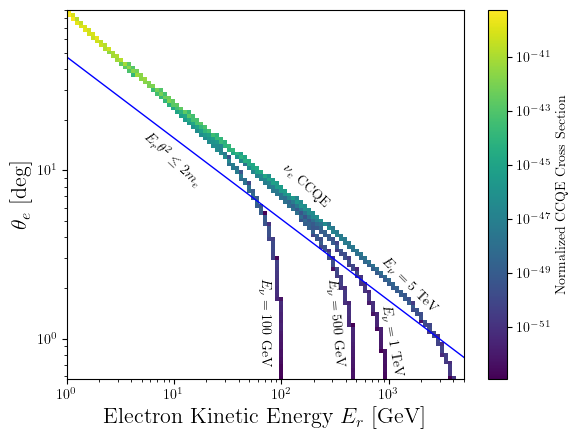

In [66]:
ev_list = [100.0, 500.0, 1000.0, 5000.0]  # in GeV

er_bins_2d = np.logspace(0, np.log10(ev_list[-1]), 100)  # GeV
theta_bins_2d = rad2deg*np.logspace(-2, np.log10(pi/2), 100)

# Lines for theoretical maximum angles
Ee_vals = np.logspace(er_bins_2d[0]-1, er_bins_2d[-1]+1, 1000)
theta_e_vals = rad2deg*sqrt(2*M_E/(Ee_vals+M_E))  # adjusted for KE -> total energy
theta_e_vals_cc = rad2deg*sqrt(2*M_P/(Ee_vals+M_P))  # adjusted for KE -> total energy
plt.plot(Ee_vals, theta_e_vals, color='b', linewidth=1.0)
#plt.plot(Ee_vals, theta_e_vals_cc, color='r', linewidth=1.0)

ccqe_event = NeutrinoNucleonCCQE(flavor="e")


plt.text(5.0, 8.0, r"$E_r \theta^2 \leq 2 m_e$", rotation=-43.0)
plt.text(100.0, 6.0, r"$\nu_e$ CCQE", rotation=-43.0)

plt.text(60.0, 0.7, r"$E_\nu = 100$ GeV", rotation=-90.0)
plt.text(250.0, 0.7, r"$E_\nu = 500$ GeV", rotation=-85.0)
plt.text(800.0, 0.6, r"$E_\nu = 1$ TeV", rotation=-80.0)
plt.text(800.0, 1.4, r"$E_\nu = 5$ TeV", rotation=-45.0)

for ev in ev_list:
    e_lep_cc, theta_lep_cc, wgt_cc = ccqe_event.rates(ev*1e3, n_samples=50000)

    plt.hist2d(1e-3*e_lep_cc, theta_lep_cc*rad2deg, weights=HBARC**2 * wgt_cc, bins=[er_bins_2d, theta_bins_2d], norm=LogNorm())

plt.xlabel(r"Electron Kinetic Energy $E_r$ [GeV]", fontsize=16)
plt.ylabel(r"$\theta_e$ [deg]", fontsize=16)

plt.colorbar(label="Normalized CCQE Cross Section")
plt.yscale('log')
plt.xscale('log')
plt.xlim((er_bins_2d[0], er_bins_2d[-1]))
plt.ylim((theta_bins_2d[0], theta_bins_2d[-1]))
plt.show()

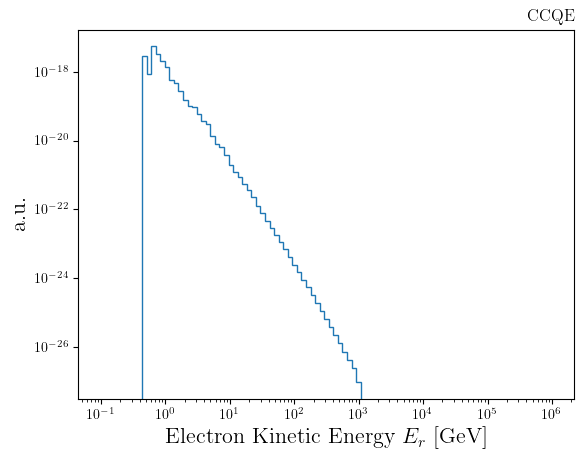

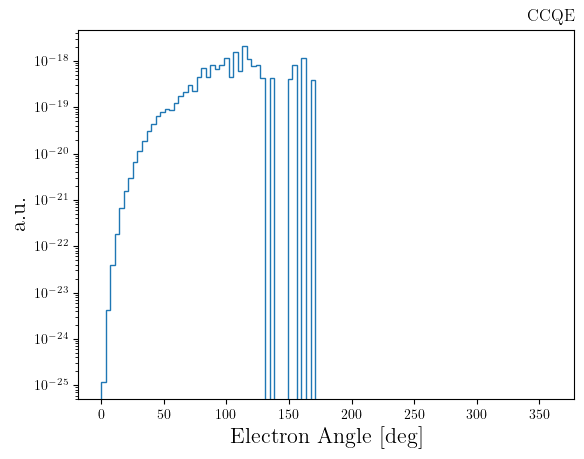

In [33]:
plt.hist(1e-3*e_lep_cc, weights=wgt_cc, bins=er_bins_2d, histtype='step')
plt.xlabel(r"Electron Kinetic Energy $E_r$ [GeV]", fontsize=16)
plt.ylabel(r"a.u.", fontsize=16)
plt.title(r"CCQE", fontsize=12, loc="right")
plt.yscale('log')
plt.xscale('log')
plt.show()


theta_bins_linear = np.linspace(0.0, 360.0, 100)
plt.hist(theta_lep_cc*rad2deg, weights=wgt_cc, bins=theta_bins_linear, histtype='step')
plt.xlabel(r"Electron Angle [deg]", fontsize=16)
plt.ylabel(r"a.u.", fontsize=16)
plt.title(r"CCQE", fontsize=12, loc="right")
plt.yscale('log')
#plt.xscale('log')
plt.show()

dsigma =  [8.03730895e-24 6.66078432e-24 1.17870820e-23 ... 5.82610129e-24
 5.26401371e-24 6.97470603e-24]
dsigma =  [2.12290867e-23 2.56738206e-23 2.56750014e-23 ... 2.09923639e-23
 2.09937278e-23 2.60714049e-23]
dsigma =  [6.94060818e-23 6.68658937e-23 6.27845747e-23 ... 6.78893383e-23
 6.88138914e-23 6.25548830e-23]
dsigma =  [1.50467079e-22 1.28266967e-22 1.26222636e-22 ... 1.51475670e-22
 1.51494861e-22 1.51489689e-22]
dsigma =  [3.20441678e-22 1.19429340e-22 1.34698096e-22 ... 1.07548651e-22
 9.90580917e-23 1.43278704e-22]
dsigma =  [7.18863577e-23 6.22516630e-22 6.34809088e-22 ... 6.35876717e-22
 1.01968003e-22 9.09575877e-23]
dsigma =  [1.13950776e-21 7.70096003e-22 9.17769380e-22 ... 7.28316572e-22
 1.60206134e-22 2.11925682e-23]
dsigma =  [6.41362208e-24 1.79265905e-23 2.06987352e-21 ... 4.47111011e-22
 3.09998308e-23 9.13031903e-23]
dsigma =  [2.04848975e-24 1.89523523e-24 3.58907780e-21 ... 4.92736317e-24
 1.04855112e-23 2.00449571e-22]
dsigma =  [6.20502218e-24 2.09561862e

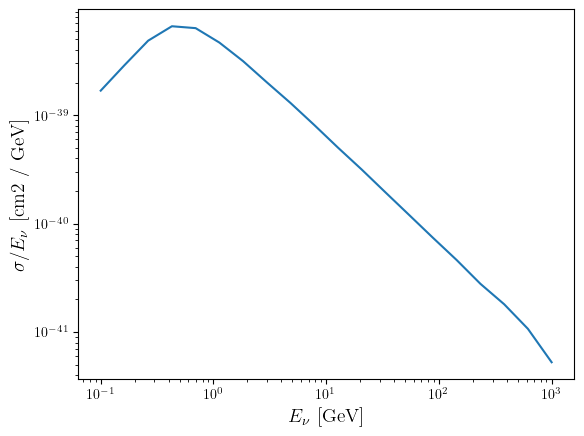

In [50]:
# Check the CCQE cross section as a function of energy

ev_list = np.logspace(2, 6, 20)  # in MeV

ccqe_event = NeutrinoNucleonCCQE(flavor="e")

sum_wgts = []

for ev in ev_list:
    _, _, wgt_cc = ccqe_event.rates(ev, n_samples=50000)
    
    sum_wgts.append(np.sum(wgt_cc))

sum_wgts = np.array(sum_wgts)

plt.plot(ev_list*1e-3, np.power(HBARC, 2)*sum_wgts/(ev_list*1e-3))
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r"$\sigma / E_\nu$ [cm2 / GeV]", fontsize=14)
plt.xlabel(r"$E_\nu$ [GeV]", fontsize=14)
plt.show()

# Can we tell that nu_mu is there?

* Null hypothesis: nuebar only
* test hypothesis: nuebar + numu

56251.96058847821
5.420098927519786e-15 1.1061426382693441e-16


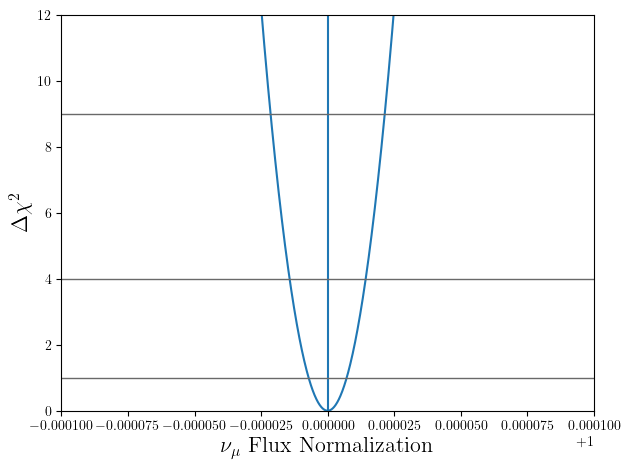

In [8]:
er_bins = np.logspace(-1, 3.2, 50)  # GeV

# Null
nuebar_spectrum = np.histogram(1e-3*nuebar_energies, weights=nuebar_energies, bins=er_bins)[0] 
numu_spectrum = np.histogram(1e-3*numu_energies, weights=numu_energies, bins=er_bins)[0]

fake_data = nuebar_spectrum + numu_spectrum
print(min(fake_data))

# Test
flux_norm = np.arange(0.999, 1.001, 0.0000001)
chi2_vals = []

for f in flux_norm:
    signal_hyp = numu_spectrum*f + nuebar_spectrum
    chi2 = np.sum((signal_hyp - fake_data)**2 / (fake_data))
    chi2_vals.append(chi2)

print(np.min(chi2_vals), np.min(chi2_vals)/49)

delta_chi2 = np.array(chi2_vals) - np.min(chi2_vals)

plt.plot(flux_norm, chi2_vals)
plt.vlines(x=1.0, ymin=0.0, ymax=12.0)
plt.ylim((0.0, 12.0))
plt.xlim((0.9999, 1.0001))
plt.ylabel(r"$\Delta\chi^2$", fontsize=16)
plt.xlabel(r"$\nu_\mu$ Flux Normalization", fontsize=16)
plt.hlines(y=1.0, xmin=0.0, xmax=2.0, color='dimgray', linewidth=1.0)
plt.hlines(y=4.0, xmin=0.0, xmax=2.0, color='dimgray', linewidth=1.0)
plt.hlines(y=9.0, xmin=0.0, xmax=2.0, color='dimgray', linewidth=1.0)
plt.tight_layout()
plt.show()


# Coupling Scan

* Draw random gL, gR normalizations
* can translate back into gV, gA later

In [52]:
# gL, gR values

gL_grid = np.arange(0.93, 1.07, 0.002)
gR_grid = np.arange(0.93, 1.07, 0.002)

er_bins = np.logspace(-1, 3.2, 50)  # GeV

# Null
nuebar_spectrum = np.histogram(1e-3*nuebar_energies, weights=nuebar_wgts, bins=er_bins)[0] 
numu_spectrum = np.histogram(1e-3*numu_energies, weights=numu_wgts, bins=er_bins)[0]
null_hypothesis_spectrum = numu_spectrum + nuebar_spectrum


eves_gen_nuebar = EvESFromNeutrinoFlux(nu_flux=precalc_nue_flux, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW)
eves_gen_numu = EvESFromNeutrinoFlux(nu_flux=precalc_numu_flux, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW)

gL_list = []
gR_list = []
chi2_list = []
for gL in gL_grid:
    print("On gL = ", gL)
    for gR in gR_grid:
        eves_gen_nuebar.simulate_eves_rectangle_rule(n_samples=100, gL_mod=gL, gR_mod=gR)
        eves_gen_numu.simulate_eves_rectangle_rule(n_samples=100, gL_mod=gL, gR_mod=gR)

        this_nuebar_e, this_nuebar_thetas, this_nuebar_phis, this_nuebar_wgts = eves_gen_nuebar.get_energy_theta_phi_wgt_arrays()
        this_numu_e, this_numu_thetas, this_numu_phis, this_numu_wgts = eves_gen_numu.get_energy_theta_phi_wgt_arrays()

        signal_spectrum = np.histogram(1e-3*this_nuebar_e, weights=this_nuebar_wgts, bins=er_bins)[0] \
                            + np.histogram(1e-3*this_numu_e, weights=this_numu_wgts, bins=er_bins)[0]
        
        chi2 = np.sum((signal_spectrum - null_hypothesis_spectrum)**2 / null_hypothesis_spectrum)

        chi2_list.append(chi2)
        gL_list.append(gL)
        gR_list.append(gR)

gL_list = np.array(gL_list)
gR_list = np.array(gR_list)
chi2_list = np.array(chi2_list)




On gL =  0.93
On gL =  0.932
On gL =  0.934
On gL =  0.936
On gL =  0.9380000000000001
On gL =  0.9400000000000001
On gL =  0.9420000000000001
On gL =  0.9440000000000001
On gL =  0.9460000000000001
On gL =  0.9480000000000001
On gL =  0.9500000000000001
On gL =  0.9520000000000001
On gL =  0.9540000000000001
On gL =  0.9560000000000001
On gL =  0.9580000000000001
On gL =  0.9600000000000001
On gL =  0.9620000000000001
On gL =  0.9640000000000001
On gL =  0.9660000000000001
On gL =  0.9680000000000001
On gL =  0.9700000000000001
On gL =  0.9720000000000001
On gL =  0.9740000000000001
On gL =  0.9760000000000001
On gL =  0.9780000000000001
On gL =  0.9800000000000001
On gL =  0.9820000000000001
On gL =  0.9840000000000001
On gL =  0.9860000000000001
On gL =  0.9880000000000001
On gL =  0.9900000000000001
On gL =  0.9920000000000001
On gL =  0.9940000000000001
On gL =  0.9960000000000001
On gL =  0.9980000000000001
On gL =  1.0
On gL =  1.0020000000000002
On gL =  1.004
On gL =  1.006000

### Show the contours on c_L vs c_R

In [45]:
# import existing limits
charm2_gv_ga = np.genfromtxt("limits/CHARM2_p1.txt")
texono_gv_ga = np.genfromtxt("limits/TEXONO_p1.txt")
dune_prism_gv_ga = np.genfromtxt("limits/DUNE_PRISM_nue_p1.txt")

70
(4900,)
0.0


/tmp/ipykernel_52224/1916344420.py:10: UserWarning: The following kwargs were not used by contour: 'algorithm'
  c = plt.contour(GL_MOD, GR_MOD, CHI2, levels=[2.3, 6.18, 11.83], colors=['b','cornflowerblue', 'lightsteelblue'],


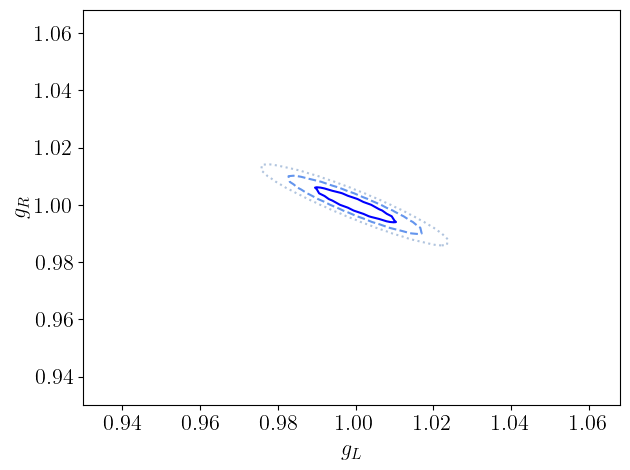

/tmp/ipykernel_52224/1916344420.py:25: UserWarning: The following kwargs were not used by contour: 'algorithm'
  c = plt.contour(GL, GR, CHI2, levels=[2.3, 6.18, 11.83], colors=['b','cornflowerblue', 'lightsteelblue'],


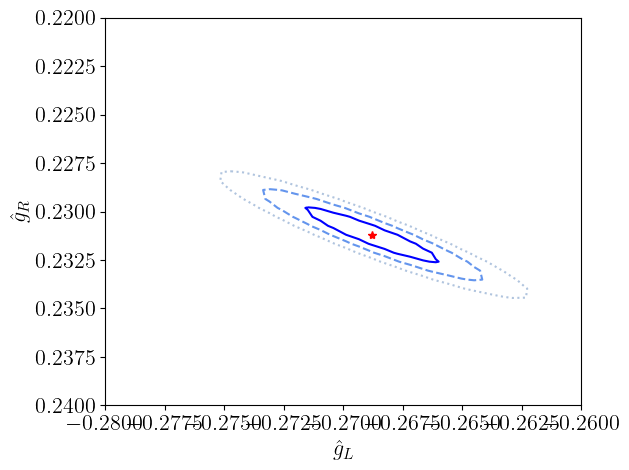

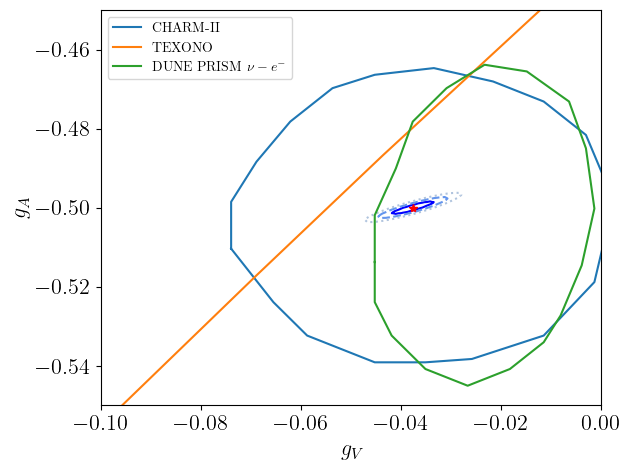

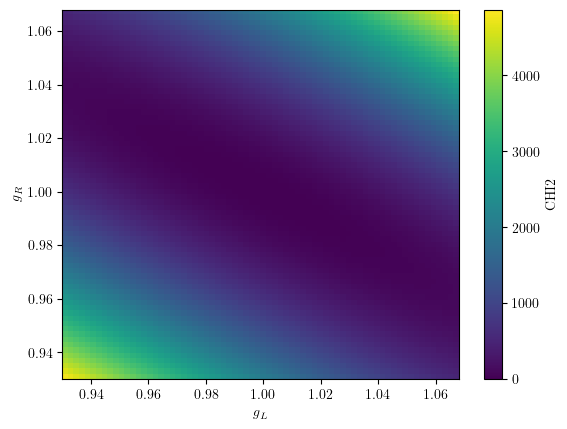

In [53]:
GL_MOD, GR_MOD = np.meshgrid(gL_grid, gR_grid)

print(gL_grid.shape[0])
print(chi2_list.shape)

CHI2 = np.reshape(chi2_list, (gL_grid.shape[0], gR_grid.shape[0])).transpose()

print(np.min(chi2_list))

c = plt.contour(GL_MOD, GR_MOD, CHI2, levels=[2.3, 6.18, 11.83], colors=['b','cornflowerblue', 'lightsteelblue'],
            linestyles=['solid', 'dashed', 'dotted'], algorithm='serial')
plt.ylabel(r"$g_R$", fontsize=16)
plt.xlabel(r"$g_L$", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()
plt.close()


# Transform to absolute values:
GL = GL_MOD * (SSW - 0.5)
GR = GR_MOD * (SSW)

c = plt.contour(GL, GR, CHI2, levels=[2.3, 6.18, 11.83], colors=['b','cornflowerblue', 'lightsteelblue'],
            linestyles=['solid', 'dashed', 'dotted'], algorithm='serial')

"""
# for trimming noisy contours
for level in c.collections:
    for kp,path in reversed(list(enumerate(level.get_paths()))):
        # go in reversed order due to deletions!

        # include test for "smallness" of your choice here:
        # I'm using a simple estimation for the diameter based on the
        #    x and y diameter...
        verts = path.vertices # (N,2)-shape array of contour line coordinates
        diameter = np.max(verts.max(axis=0) - verts.min(axis=0))

        if diameter<0.01: # threshold to be refined for your actual dimensions!
            del(level.get_paths()[kp])  # no remove() for Path objects:(
"""
            
# Plot SM point
plt.plot(SSW-0.5, SSW, marker='*', color='r')

plt.ylabel(r"$\hat{g}_R$", fontsize=16)
plt.xlabel(r"$\hat{g}_L$", fontsize=16)
plt.ylim((0.24,0.22))
plt.xlim((-0.28, -0.26))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()
plt.close()


# Show them as a function of gV, gA
CV = (GL + GR)
CA = (GL - GR)

plt.contour(CV, CA, CHI2, levels=[2.3, 6.18, 11.83], colors=['b','cornflowerblue', 'lightsteelblue'],
            linestyles=['solid', 'dashed', 'dotted'])
plt.plot(2*SSW-0.5, -0.5, marker='*', color='r')

# plot existing limits
plt.plot(charm2_gv_ga[:,0], charm2_gv_ga[:,1], label="CHARM-II")
plt.plot(texono_gv_ga[:,0], texono_gv_ga[:,1], label="TEXONO")
plt.plot(dune_prism_gv_ga[:,0], dune_prism_gv_ga[:,1], label=r"DUNE PRISM $\nu - e^-$")

plt.ylabel(r"$g_A$", fontsize=16)
plt.xlabel(r"$g_V$", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.ylim((-0.55,-0.45))
plt.xlim((-0.1, 0.0))
plt.tight_layout()
plt.savefig("plots/sensitivity_gV_gA_3TeV_20240820.pdf")
plt.show()
plt.close()

plt.imshow(CHI2-min(chi2_list), extent=[gL_grid.min(), gL_grid.max(), gR_grid.min(), gR_grid.max()], 
           origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='CHI2')

# Adding labels to the axes
plt.xlabel(r'$g_L$')
plt.ylabel(r'$g_R$')

# Display the plot
plt.show()


# Sin^2(θw) measurement

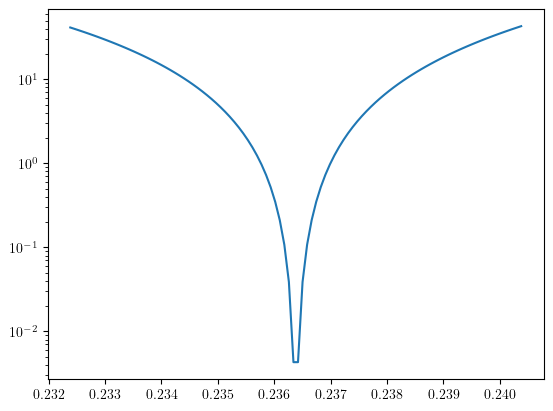

In [19]:
# scan over sin^2(theta_W)

SSW_AT_1GEV = 0.23638198757763973

sw2_test_pts = SSW_AT_1GEV + np.linspace(-0.004, 0.004, 100)


er_bins = np.logspace(-1, 3.2, 50)  # GeV


eves_gen_nuebar = EvESFromNeutrinoFlux(nu_flux=precalc_nue_flux, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV)
eves_gen_numu = EvESFromNeutrinoFlux(nu_flux=precalc_numu_flux, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV)

eves_gen_nuebar.simulate_eves_rectangle_rule(n_samples=100)
eves_gen_numu.simulate_eves_rectangle_rule(n_samples=100)

this_nuebar_e, this_nuebar_thetas, this_nuebar_phis, this_nuebar_wgts = eves_gen_nuebar.get_energy_theta_phi_wgt_arrays()
this_numu_e, this_numu_thetas, this_numu_phis, this_numu_wgts = eves_gen_numu.get_energy_theta_phi_wgt_arrays()

# Null
nuebar_spectrum = np.histogram(1e-3*this_nuebar_e, weights=this_nuebar_wgts, bins=er_bins)[0] 
numu_spectrum = np.histogram(1e-3*this_numu_e, weights=this_numu_wgts, bins=er_bins)[0]
null_hypothesis_spectrum = numu_spectrum + nuebar_spectrum


sw2_list = []
chi2_list = []
for sw2 in sw2_test_pts:
    eves_gen_nuebar.sw2 = sw2
    eves_gen_numu.sw2 = sw2
    eves_gen_nuebar.simulate_eves_rectangle_rule(n_samples=100)
    eves_gen_numu.simulate_eves_rectangle_rule(n_samples=100)

    this_nuebar_e, this_nuebar_thetas, this_nuebar_phis, this_nuebar_wgts = eves_gen_nuebar.get_energy_theta_phi_wgt_arrays()
    this_numu_e, this_numu_thetas, this_numu_phis, this_numu_wgts = eves_gen_numu.get_energy_theta_phi_wgt_arrays()

    signal_spectrum = np.histogram(1e-3*this_nuebar_e, weights=this_nuebar_wgts, bins=er_bins)[0] \
                        + np.histogram(1e-3*this_numu_e, weights=this_numu_wgts, bins=er_bins)[0]
    
    chi2 = np.sum((signal_spectrum - null_hypothesis_spectrum)**2 / null_hypothesis_spectrum)

    chi2_list.append(chi2)
    sw2_list.append(sw2)

sw2_list = np.array(sw2_list)
chi2_list = np.array(chi2_list)



plt.plot(sw2_list, chi2_list)
plt.yscale('log')
plt.show()


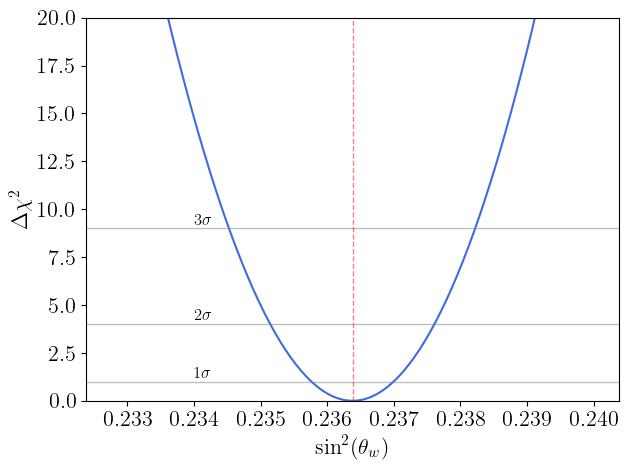

In [28]:
plt.plot(sw2_list, chi2_list, color='royalblue')

# draw 1, 2, 3 sigma lines
plt.hlines(y=1.0, xmin=min(sw2_list), xmax=max(sw2_list), color='gray', linewidth=1.0, alpha=0.5)
plt.hlines(y=4.0, xmin=min(sw2_list), xmax=max(sw2_list), color='gray', linewidth=1.0, alpha=0.5)
plt.hlines(y=9.0, xmin=min(sw2_list), xmax=max(sw2_list), color='gray', linewidth=1.0, alpha=0.5)

plt.text(0.234, 1.2, r"$1\sigma$", fontsize=12)
plt.text(0.234, 4.2, r"$2\sigma$", fontsize=12)
plt.text(0.234, 9.2, r"$3\sigma$", fontsize=12)


plt.vlines(x=SSW_AT_1GEV, ymin=0.0, ymax=20.0, color='r', linewidth=1.0, ls='dashed', alpha=0.5)
plt.ylim((0.0, 20.0))
plt.xlim((min(sw2_list),max(sw2_list)))
plt.xlabel(r"$\sin^2 (\theta_w)$", fontsize=16)
plt.ylabel(r"$\Delta\chi^2$", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()

plt.savefig("plots/weak_mixing/WMA_deltaChi2_3TeV_SR.pdf")

plt.show()

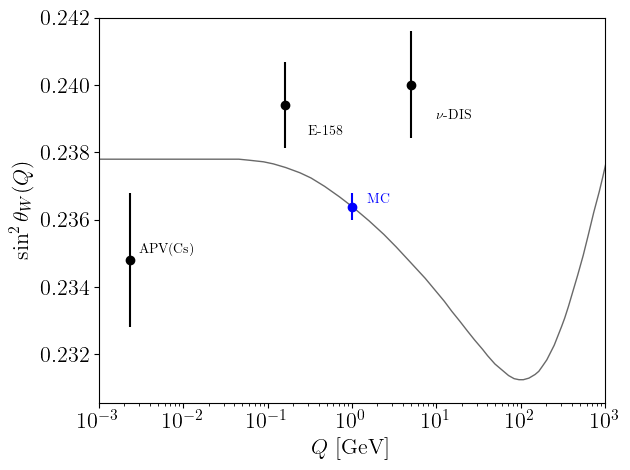

In [27]:
sw2_dat = np.genfromtxt("data/sw2_theory_curve_Q2.txt")

mucol_1sigma_sw2_vals = [SSW_AT_1GEV]
mucol_1sigma_Q2_vals = [1.0]
mucol_1sigma_Q2_err = [0.0004]

nuDIS = [5.0, 0.24, 0.00159]
E158 = [0.16, 0.2394, 0.00128]
APV = [2.35e-3, 0.2348, 0.002]

plt.plot(sw2_dat[:,0], sw2_dat[:,1], color='dimgray', linewidth=1.0)
plt.errorbar(mucol_1sigma_Q2_vals, mucol_1sigma_sw2_vals, yerr=mucol_1sigma_Q2_err, color='b', marker='o', ls='none')
plt.errorbar(nuDIS[0], nuDIS[1], yerr=nuDIS[2], color='k', marker='o', ls='none')
plt.errorbar(E158[0], E158[1], yerr=E158[2], color='k', marker='o', ls='none')
plt.errorbar(APV[0], APV[1], yerr=APV[2], color='k', marker='o', ls='none')

# text labels
plt.text(3e-3, 0.235, "APV(Cs)")
plt.text(3e-1, 0.2385, "E-158")
plt.text(10.0, 0.239, r"$\nu$-DIS")
plt.text(1.5, 0.2365, r"MC", color="b")

plt.xscale('log')
plt.xlabel(r"$Q$ [GeV]", fontsize=16)
plt.ylabel(r"$\sin^2 \theta_W (Q)$", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylim(top=0.242)
plt.xlim((1e-3, 1e3))
plt.tight_layout()

plt.savefig("plots/weak_mixing/WMA_by_Q_3TeV_SR.pdf")

plt.show()



# Generate sqrt(s) = 500 GeV, 3 TeV, and 10 TeV fluxes

In [2]:
# OLD FLUXES WITH ANGLE
"""
numu_flux_500GeV = np.genfromtxt("data/numu_flux_MeV_rad_SqrtS-500GeV_216e19Mu_25m2_by_10m_200m.txt")
nue_flux_500GeV = np.genfromtxt("data/nuebar_flux_MeV_rad_SqrtS-500GeV_216e19Mu_25m2_by_10m_200m.txt")

numu_flux_3TeV = np.genfromtxt("data/numu_flux_MeV_rad_SqrtS-3TeV_216e19Mu_25m2_by_10m_200m.txt")
nue_flux_3TeV = np.genfromtxt("data/nuebar_flux_MeV_rad_SqrtS-3TeV_216e19Mu_25m2_by_10m_200m.txt")

numu_flux_10TeV = np.genfromtxt("data/numu_flux_MeV_rad_SqrtS-10TeV_216e19Mu_25m2_by_10m_200m.txt")
nue_flux_10TeV = np.genfromtxt("data/nuebar_flux_MeV_rad_SqrtS-10TeV_216e19Mu_25m2_by_10m_200m.txt")
"""

# NEW FLUXES
numu_flux_500GeV = np.genfromtxt("data/numu_energy_flux_MeV_SqrtS-500GeV_1e19nu.txt")
nue_flux_500GeV = np.genfromtxt("data/nuebar_energy_flux_MeV_SqrtS-500GeV_7e18nu.txt")

numu_flux_3TeV = np.genfromtxt("data/numu_energy_flux_MeV_SqrtS-3TeV_1e19nu.txt")
nue_flux_3TeV = np.genfromtxt("data/nuebar_energy_flux_MeV_SqrtS-3TeV_7e18nu.txt")

numu_flux_10TeV = np.genfromtxt("data/numu_energy_flux_MeV_SqrtS-10TeV_11e18nu.txt")
nue_flux_10TeV = np.genfromtxt("data/nuebar_energy_flux_MeV_SqrtS-10TeV_7e18nu.txt")

In [3]:
SSW_AT_1GEV = 0.23638198757763973
N_SAMPLES = 500

# sqrt(s) = 500 GeV
eves_gen_nuebar_500 = EvESFromNeutrinoFlux(nu_flux=nue_flux_500GeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV, energy_only_flux=True)
eves_gen_numu_500 = EvESFromNeutrinoFlux(nu_flux=numu_flux_500GeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV, energy_only_flux=True)
eves_gen_nuebar_500.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_500.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_500, _, _, nuebar_wgts_500 = eves_gen_nuebar_500.get_energy_theta_phi_wgt_arrays()
numu_energies_500, _, _, numu_wgts_500 = eves_gen_numu_500.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_500 = EvESFromNeutrinoFlux(nu_flux=nue_flux_500GeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV, energy_only_flux=True)
eves_gen_numubar_500 = EvESFromNeutrinoFlux(nu_flux=numu_flux_500GeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV, energy_only_flux=True)
eves_gen_nue_500.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numubar_500.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nue_energies_500, _, _, nue_wgts_500 = eves_gen_nue_500.get_energy_theta_phi_wgt_arrays()
numubar_energies_500, _, _, numubar_wgts_500 = eves_gen_numubar_500.get_energy_theta_phi_wgt_arrays()

# sqrt(s) = 3 TeV
eves_gen_nuebar_3TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_3TeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV, energy_only_flux=True)
eves_gen_numu_3TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_3TeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV, energy_only_flux=True)
eves_gen_nuebar_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_3TeV, _, _, nuebar_wgts_3TeV = eves_gen_nuebar_3TeV.get_energy_theta_phi_wgt_arrays()
numu_energies_3TeV, _, _, numu_wgts_3TeV = eves_gen_numu_3TeV.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_3TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_3TeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV, energy_only_flux=True)
eves_gen_numubar_3TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_3TeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV, energy_only_flux=True)
eves_gen_nue_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numubar_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nue_energies_3TeV, _, _, nue_wgts_3TeV = eves_gen_nue_3TeV.get_energy_theta_phi_wgt_arrays()
numubar_energies_3TeV, _, _, numubar_wgts_3TeV = eves_gen_numubar_3TeV.get_energy_theta_phi_wgt_arrays()

# sqrt(s) = 10 TeV
eves_gen_nuebar_10TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV, energy_only_flux=True)
eves_gen_numu_10TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV, energy_only_flux=True)
eves_gen_nuebar_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_10TeV, _, _, nuebar_wgts_10TeV = eves_gen_nuebar_10TeV.get_energy_theta_phi_wgt_arrays()
numu_energies_10TeV, _, _, numu_wgts_10TeV = eves_gen_numu_10TeV.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_10TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV, energy_only_flux=True)
eves_gen_numubar_10TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV, energy_only_flux=True)
eves_gen_nue_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numubar_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nue_energies_10TeV, _, _, nue_wgts_10TeV = eves_gen_nue_10TeV.get_energy_theta_phi_wgt_arrays()
numubar_energies_10TeV, _, _, numubar_wgts_10TeV = eves_gen_numubar_10TeV.get_energy_theta_phi_wgt_arrays()

### plot SSW(Q) against momentum transfer specturm

In [50]:
print(nuebar_energies_3TeV)
print(2*M_E)

[0.00000000e+00 1.51813669e+01 3.03627338e+01 ... 1.48644233e+06
 1.48943316e+06 1.49242399e+06]
1.022


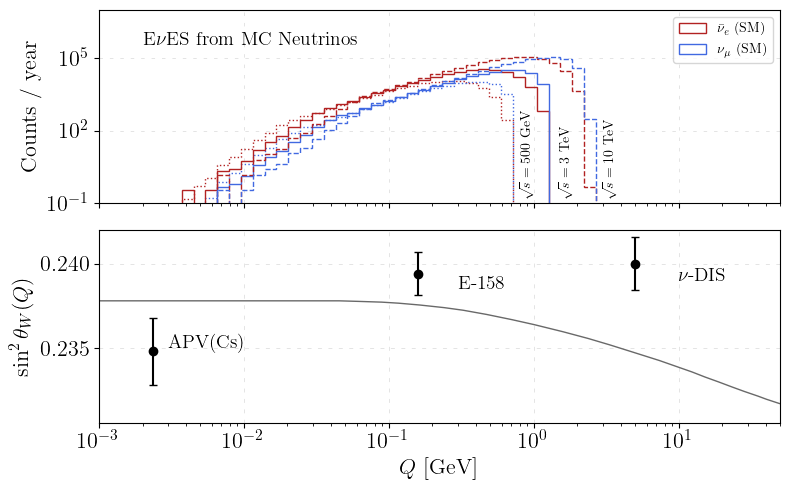

In [6]:
sw2_dat = np.genfromtxt("data/sw2_theory_curve_Q2.txt")
SSW_AT_1GEV = 0.23638198757763973


mucol_1sigma_sw2_vals = [SSW_AT_1GEV]
mucol_1sigma_Q2_vals = [1.0]
mucol_1sigma_Q2_err = [0.0004]

nuDIS = [5.0, 0.24, 0.00159]
E158 = [0.16, 0.2394, 0.00128]
APV = [2.35e-3, 0.2348, 0.002]

# Create the figure and set up the grid
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

q_bins = np.logspace(-3, 1)

# Top panel: Recoil energy spectrum plot
ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_500), weights=nuebar_wgts_500, bins=q_bins, histtype='step',
         color='firebrick', ls='dotted')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_500), weights=numu_wgts_500, bins=q_bins, histtype='step',
         color='royalblue', ls='dotted')

ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_3TeV), weights=nuebar_wgts_3TeV, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_e$ (SM)", color='firebrick')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_3TeV), weights=numu_wgts_3TeV, bins=q_bins, histtype='step',
         label=r"$\nu_\mu$ (SM)", color='royalblue')

ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_10TeV), weights=nuebar_wgts_10TeV, bins=q_bins, histtype='step',
         color='firebrick', ls='dashed')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_10TeV), weights=numu_wgts_10TeV, bins=q_bins, histtype='step',
         color='royalblue', ls='dashed')

ax1.text(2e-3, 370000, r"E$\nu$ES from MC Neutrinos", fontsize=14)

ax1.text(8e-1, 2e-1, r"$\sqrt{s}=500$ GeV", rotation=90.0)
ax1.text(1.5, 2e-1, r"$\sqrt{s}=3$ TeV", rotation=90.0)
ax1.text(3, 2e-1, r"$\sqrt{s}=10$ TeV", rotation=90.0)

ax1.legend(loc="upper right")


ax1.set_ylabel("Counts / year", fontsize=16)
ax1.set_xlim((q_bins[0], q_bins[-1]))
ax1.set_ylim((0.1, 1e7))
ax1.set_yscale('log')

# Bottom panel: sin^2(theta) plot
ax2.plot(sw2_dat[:,0], sw2_dat[:,1], color='dimgray', linewidth=1.0)
ax2.errorbar(nuDIS[0], nuDIS[1], yerr=nuDIS[2], color='k', marker='o', ls='none', capsize=3)
ax2.errorbar(E158[0], E158[1], yerr=E158[2], color='k', marker='o', ls='none', capsize=3)
ax2.errorbar(APV[0], APV[1], yerr=APV[2], color='k', marker='o', ls='none', capsize=3)

ax2.text(3e-3, 0.235, "APV(Cs)", fontsize=14)
ax2.text(3e-1, 0.2385, "E-158", fontsize=14)
ax2.text(10.0, 0.239, r"$\nu$-DIS", fontsize=14)

ax2.set_xscale('log')
ax2.set_xlabel(r"$Q$ [GeV]", fontsize=16)
ax2.set_ylabel(r"$\sin^2 \theta_W (Q)$", fontsize=16)
ax2.set_ylim(top=0.242)
ax2.set_xlim((1e-3, 5e1))

ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)
ax2.tick_params(axis="x", labelsize=16)
ax2.tick_params(axis="y", labelsize=16)

# set the grid
ax1.grid(True, linestyle='-', linewidth=0.5, alpha=0.3, color='gray', dashes=(5,10))
ax2.grid(True, linestyle='-', linewidth=0.5, alpha=0.3, color='gray', dashes=(5,10))
for line in plt.gca().xaxis.get_gridlines():
    line.set_dash_capstyle('round')
for line in plt.gca().yaxis.get_gridlines():
    line.set_dash_capstyle('round')

# Final adjustments and save
plt.tight_layout()
plt.savefig("plots/weak_mixing/EvES_spectra_by_COM_energy_vs_Q_and_SSW.pdf")
plt.show()

#### Check endpoint energies and $<Q>$

In [7]:
q_bins_500 = np.logspace(np.log10(0.005), np.log10(0.55), 25)
q_centers_500 = (q_bins_500[1:] + q_bins_500[:-1])/2

hist_nuebar_500, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_500), weights=nuebar_wgts_500, bins=q_bins_500)
hist_numu_500, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_500), weights=numu_wgts_500, bins=q_bins_500)
hist_nue_500, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_500), weights=nue_wgts_500, bins=q_bins_500)
hist_numubar_500, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_500), weights=numubar_wgts_500, bins=q_bins_500)

q_bins_3TeV = np.logspace(np.log10(0.01), np.log10(1.4), 25)
q_centers_3TeV = (q_bins_3TeV[1:] + q_bins_3TeV[:-1])/2
hist_nuebar_3TeV, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_3TeV), weights=nuebar_wgts_3TeV, bins=q_bins_3TeV)
hist_numu_3TeV, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_3TeV), weights=numu_wgts_3TeV, bins=q_bins_3TeV)
hist_nue_3TeV, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_3TeV), weights=nue_wgts_3TeV, bins=q_bins_3TeV)
hist_numubar_3TeV, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_3TeV), weights=numubar_wgts_3TeV, bins=q_bins_3TeV)

q_bins_10TeV = np.logspace(-1.69, 0.34, 26)
q_centers_10TeV = (q_bins_10TeV[1:] + q_bins_10TeV[:-1])/2
hist_nuebar_10TeV, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_10TeV), weights=nuebar_wgts_10TeV, bins=q_bins_10TeV)
hist_numu_10TeV, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_10TeV), weights=numu_wgts_10TeV, bins=q_bins_10TeV)
hist_nue_10TeV, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_10TeV), weights=nue_wgts_10TeV, bins=q_bins_10TeV)
hist_numubar_10TeV, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_10TeV), weights=numubar_wgts_10TeV, bins=q_bins_10TeV)

print("----------NUEBAR-------------")
print("Null event rates for 500 GeV = ", hist_nuebar_500, "total = ", np.sum(hist_nuebar_500))
print("Null event rates for 3 TeV = ", hist_nuebar_3TeV, "total = ", np.sum(hist_nuebar_3TeV))
print("Null event rates for 10 TeV = ", hist_nuebar_10TeV, "total = ", np.sum(hist_nuebar_10TeV))
print("\n")

print("----------NUE-------------")
print("Null event rates for 500 GeV = ", hist_nue_500, "total = ", np.sum(hist_nue_500))
print("Null event rates for 3 TeV = ", hist_nue_3TeV, "total = ", np.sum(hist_nue_3TeV))
print("Null event rates for 10 TeV = ", hist_nue_10TeV, "total = ", np.sum(hist_nue_10TeV))
print("\n")

print("----------NUMU-------------")
print("Null event rates for 500 GeV = ", hist_numu_500, "total = ", np.sum(hist_numu_500))
print("Null event rates for 3 TeV = ", hist_numu_3TeV, "total = ", np.sum(hist_numu_3TeV))
print("Null event rates for 10 TeV = ", hist_numu_10TeV, "total = ", np.sum(hist_numu_10TeV))
print("\n")

print("----------NUMUBAR-------------")
print("Null event rates for 500 GeV = ", hist_numubar_500, "total = ", np.sum(hist_numubar_500))
print("Null event rates for 3 TeV = ", hist_numubar_3TeV, "total = ", np.sum(hist_numubar_3TeV))
print("Null event rates for 10 TeV = ", hist_numubar_10TeV, "total = ", np.sum(hist_numubar_10TeV))
print("\n")

# Get means
print("Mean = {}, max = {}".format(np.sum(hist_nue_500*q_centers_500/np.sum(hist_nue_500)), q_centers_500[np.argmax(hist_nue_500)]))
print("Mean = {}, max = {}".format(np.sum(hist_nue_3TeV*q_centers_3TeV/np.sum(hist_nue_3TeV)), q_centers_3TeV[np.argmax(hist_nue_3TeV)]))
print("Mean = {}, max = {}".format(np.sum(hist_nue_10TeV*q_centers_10TeV/np.sum(hist_nue_10TeV)), q_centers_10TeV[np.argmax(hist_nue_10TeV)]))



----------NUEBAR-------------
Null event rates for 500 GeV =  [1.58018871e+00 1.98280491e+00 7.54434687e+00 1.64159713e+01
 3.25926078e+01 7.12831890e+01 1.59593326e+02 2.62227519e+02
 4.02117055e+02 5.22902043e+02 8.26276667e+02 1.17307324e+03
 1.70305975e+03 2.40764382e+03 3.40289939e+03 4.68762291e+03
 6.28052920e+03 8.14618288e+03 1.00167298e+04 1.14942441e+04
 1.20204022e+04 1.09132882e+04 8.00471617e+03 4.10488427e+03] total =  86659.79163031591
Null event rates for 3 TeV =  [9.51280065e+00 1.92665486e+01 5.50056037e+01 1.09251310e+02
 2.33903505e+02 5.09302467e+02 9.26252126e+02 1.31834010e+03
 1.89606544e+03 2.80294695e+03 4.20843009e+03 6.10530048e+03
 8.71624062e+03 1.24221771e+04 1.71833879e+04 2.29200510e+04
 2.92160217e+04 3.48856698e+04 3.79946747e+04 3.60118968e+04
 2.76801777e+04 1.50178922e+04 3.80802223e+03 5.56357158e+01] total =  264105.4248965859
Null event rates for 10 TeV =  [4.66795790e+01 1.02903478e+02 1.63182837e+02 4.22543915e+02
 8.12127109e+02 1.55607264e+

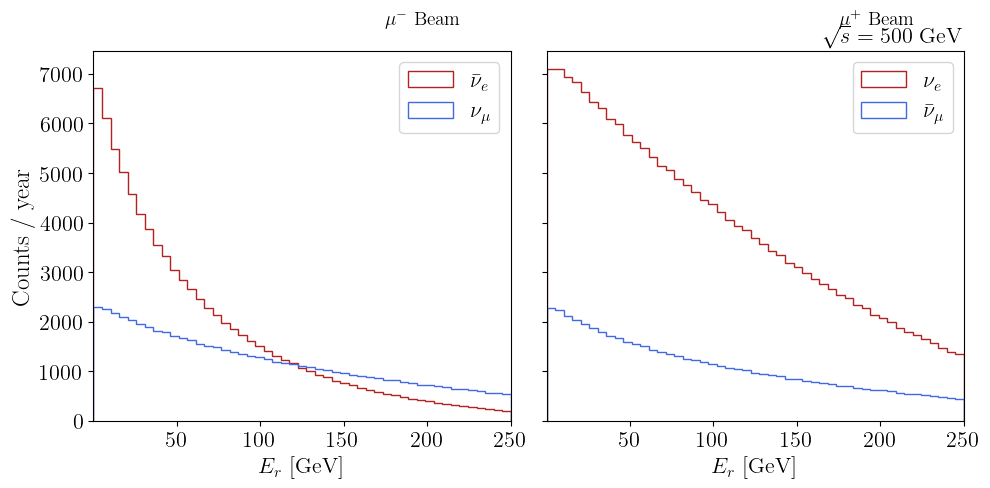

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

er_bins_500 = np.linspace(0.1,250.0, 50)  # GeV

ax1.hist(1e-3*nuebar_energies_500, weights=nuebar_wgts_500, bins=er_bins_500, histtype='step',
         label=r"$\bar{\nu}_e$", color='firebrick')
ax1.hist(1e-3*numu_energies_500, weights=numu_wgts_500, bins=er_bins_500, histtype='step',
         label=r"$\nu_\mu$", color='royalblue')

ax2.hist(1e-3*nue_energies_500, weights=nue_wgts_500, bins=er_bins_500, histtype='step',
         label=r"$\nu_e$", color='firebrick')
ax2.hist(1e-3*numubar_energies_500, weights=numubar_wgts_500, bins=er_bins_500, histtype='step',
         label=r"$\bar{\nu}_\mu$", color='royalblue')
ax1.legend(fontsize=16)
ax2.legend(fontsize=16)

ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)
ax2.tick_params(axis="x", labelsize=16)
ax2.tick_params(axis="y", labelsize=16)

ax1.set_xlabel(r"$E_r$ [GeV]", fontsize=16)
ax2.set_xlabel(r"$E_r$ [GeV]", fontsize=16)
ax1.set_xlim((er_bins_500[0], er_bins_500[-1]))
ax2.set_xlim((er_bins_500[0], er_bins_500[-1]))

ax1.set_ylabel("Counts / year", fontsize=18)

ax1.text(175.0, 8000.0, "$\mu^-$ Beam", fontsize=14)
ax2.text(175.0, 8000.0, "$\mu^+$ Beam", fontsize=14)

plt.title(r"$\sqrt{s} = 500$ GeV", loc="right", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.savefig("plots/spectra/MC-500GeV_EvES_4flavor_recoil_energy.pdf")
plt.show()

331773.9937663059 331773.895423815


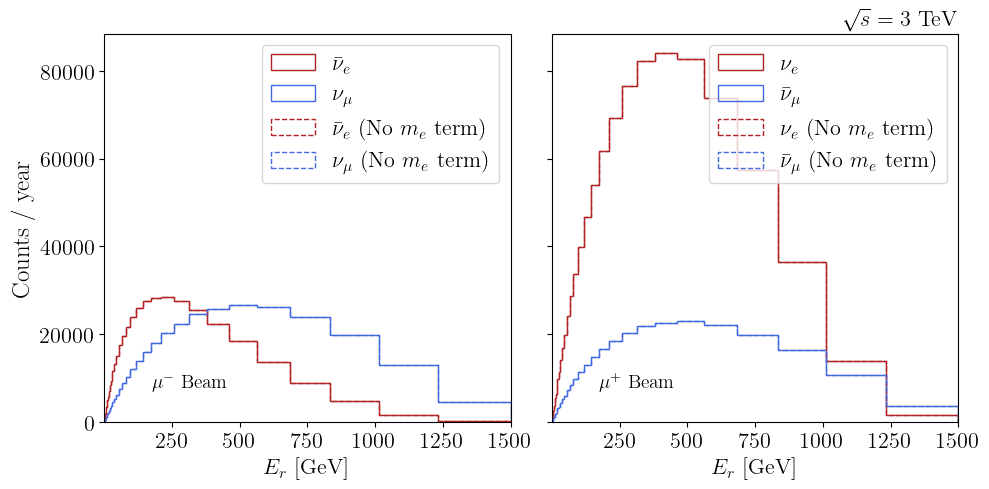

In [8]:
eves_gen_nuebar_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES, turn_off_cross_term=True)
eves_gen_numu_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES, turn_off_cross_term=True)
nuebar_energies_3TeV_NX, _, _, nuebar_wgts_3TeV_NX = eves_gen_nuebar_3TeV.get_energy_theta_phi_wgt_arrays()
numu_energies_3TeV_NX, _, _, numu_wgts_3TeV_NX = eves_gen_numu_3TeV.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES, turn_off_cross_term=True)
eves_gen_numubar_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES, turn_off_cross_term=True)
nue_energies_3TeV_NX, _, _, nue_wgts_3TeV_NX = eves_gen_nue_3TeV.get_energy_theta_phi_wgt_arrays()
numubar_energies_3TeV_NX, _, _, numubar_wgts_3TeV_NX = eves_gen_numubar_3TeV.get_energy_theta_phi_wgt_arrays()

print(np.sum(numu_wgts_3TeV), np.sum(numu_wgts_3TeV_NX))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

er_bins_3TeV = np.logspace(-1, np.log10(1500.0), 50)  # GeV

# With full cross section
ax1.hist(1e-3*nuebar_energies_3TeV, weights=nuebar_wgts_3TeV, bins=er_bins_3TeV, histtype='step',
         label=r"$\bar{\nu}_e$", color='firebrick')
ax1.hist(1e-3*numu_energies_3TeV, weights=numu_wgts_3TeV, bins=er_bins_3TeV, histtype='step',
         label=r"$\nu_\mu$", color='royalblue')

ax2.hist(1e-3*nue_energies_3TeV, weights=nue_wgts_3TeV, bins=er_bins_3TeV, histtype='step',
         label=r"$\nu_e$", color='firebrick')
ax2.hist(1e-3*numubar_energies_3TeV, weights=numubar_wgts_3TeV, bins=er_bins_3TeV, histtype='step',
         label=r"$\bar{\nu}_\mu$", color='royalblue')

# without cross term propto electron mass
ax1.hist(1e-3*nuebar_energies_3TeV_NX, weights=nuebar_wgts_3TeV_NX, bins=er_bins_3TeV, histtype='step',
         label=r"$\bar{\nu}_e$ (No $m_e$ term)", color='firebrick', ls='dashed')
ax1.hist(1e-3*numu_energies_3TeV_NX, weights=numu_wgts_3TeV_NX, bins=er_bins_3TeV, histtype='step',
         label=r"$\nu_\mu$ (No $m_e$ term)", color='royalblue', ls='dashed')

ax2.hist(1e-3*nue_energies_3TeV_NX, weights=nue_wgts_3TeV_NX, bins=er_bins_3TeV, histtype='step',
         label=r"$\nu_e$ (No $m_e$ term)", color='firebrick', ls='dashed')
ax2.hist(1e-3*numubar_energies_3TeV_NX, weights=numubar_wgts_3TeV_NX, bins=er_bins_3TeV, histtype='step',
         label=r"$\bar{\nu}_\mu$ (No $m_e$ term)", color='royalblue', ls='dashed')


ax1.legend(fontsize=16)
ax2.legend(fontsize=16)

ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)
ax2.tick_params(axis="x", labelsize=16)
ax2.tick_params(axis="y", labelsize=16)

ax1.set_xlabel(r"$E_r$ [GeV]", fontsize=16)
ax2.set_xlabel(r"$E_r$ [GeV]", fontsize=16)
ax1.set_xlim((er_bins_3TeV[0], er_bins_3TeV[-1]))
ax2.set_xlim((er_bins_3TeV[0], er_bins_3TeV[-1]))

ax1.set_ylabel("Counts / year", fontsize=18)

ax1.text(175.0, 8000.0, "$\mu^-$ Beam", fontsize=14)
ax2.text(175.0, 8000.0, "$\mu^+$ Beam", fontsize=14)

plt.title(r"$\sqrt{s} = 3$ TeV", loc="right", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.savefig("plots/spectra/MC-3TeV_EvES_4flavor_recoil_energy_noME.pdf")
plt.show()

# Collect Benchmarks for Muon Storage + MuCol

## Muon Storage Ring: only nu_mu, nu_ebar

* 500 GeV
* 3 TeV
* 10 TeV

## Muon Collider

* 500 GeV
* 3 TeV
* 10 TeV

## Naming Conventions
* SR = Storage Ring
* MC = muon collider
* WMA = weak mixing angle
* GVGA = g_V and g_A couplings

ex: WMA_deltaChi2_3TeV_SR_200m_25m2_by_10m = Weak mixing angle measurement from a 3 TeV muon storage ring with a 25 m^2 by 10m long detector 200 m away

## Plotting gV vs gA: MultiNest benchmarks

In [2]:
mndat_MC_500GeV_2param = np.genfromtxt("multinest/Quest/MC/sqrts-500GeV_MC_2param_.txt")
mndat_MC_3TeV_2param = np.genfromtxt("multinest/Quest/MC/sqrts-3TeV_MC_2param_.txt")
mndat_MC_10TeV_2param = np.genfromtxt("multinest/Quest/MC/sqrts-10TeV_MC_2param_.txt")

mndat_SR_500GeV_2param = np.genfromtxt("multinest/Quest/SR/sqrts-500GeV_SR_2param_.txt")
mndat_SR_3TeV_2param = np.genfromtxt("multinest/Quest/SR/sqrts-3TeV_SR_2param_.txt")
mndat_SR_10TeV_2param = np.genfromtxt("multinest/Quest/SR/sqrts-10TeV_SR_2param_.txt")

In [ ]:
fluxes_dict = {
    "500GeV": {
        "SSW": 0.23739130434782607  # at 0.24 GeV
    },
    "3TeV": {
        "SSW": 0.23667701863354035  # at 0.7 GeV
    },
    "10TeV": {
        "SSW": 0.23596273291925465  # at 1.5 GeV
    }
}

from scipy.interpolate import griddata

from matplotlib.lines import Line2D


def plot_gV_gA_2param(mndat_list, slist, marker_list=["*", "+", "x"],
                        color_list=['royalblue', 'orange', 'mediumseagreen'],
                        plot_points=False, plot_title=r"$\mu^+ \mu^-$ Collider",
                        label_list=[r"$\sqrt{s} = 500$ GeV", r"$\sqrt{s} = 3$ TeV", r"$\sqrt{s} = 10$ TeV"],
                        save_name="plots/VA_couplings/gV_gA_MC_benchmark_sensitivity.pdf"):

    # Begin plotting: Two quadrants
    fig, axes = plt.subplots(1, 2, figsize=(13, 6))
    fig.subplots_adjust(hspace=0.05, wspace=0.3)

    handles, labels = plt.gca().get_legend_handles_labels()

    for i, mndat in enumerate(mndat_list):
        # Read in data
        g_L = mndat[:, 2]
        g_R = mndat[:, 3]
        deltaChi2 = mndat[:, 1]

        # Assign colors and alphas based on different contours
        colors = np.zeros_like(deltaChi2, dtype=object)
        colors[deltaChi2 < 2.3] = 'navy'
        colors[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)] = 'mediumseagreen'
        colors[deltaChi2 >= 6.18] = 'silver'

        alphas = np.zeros_like(deltaChi2, dtype=object)
        alphas[deltaChi2 < 2.3] = 0.5
        alphas[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)]  = 0.9
        alphas[deltaChi2 >= 6.18] = 0.0

        gV = (g_L + g_R)
        gA = (g_L - g_R)

        if plot_points:
            axes[0].scatter(gV, gA, c=colors, alpha=alphas, cmap='viridis', s=1)
        
        axes[0].set_xlim((-0.505, -0.495))
        axes[0].set_ylim((-0.03, -0.02))
        axes[0].set_ylabel(r"$g_A$", fontsize=16)
        axes[0].set_xlabel(r"$g_V$", fontsize=16)

        # Try with grid interp
        grid_x, grid_y = np.mgrid[min(gV):max(gV):5000j, min(gA):max(gA):5000j]
        grid_deltaChi2 = griddata((gV, gA), deltaChi2, (grid_x, grid_y), method='cubic')
        axes[0].contour(grid_x, grid_y, grid_deltaChi2, levels=[4.61], colors=color_list[i])

        if plot_points:    
            axes[1].scatter(gV, gA, c=colors, alpha=alphas, cmap='viridis', s=1)
        
        axes[1].set_xlim((-0.03, -0.02))
        axes[1].set_ylim((-0.505, -0.495))
        axes[1].set_xlabel(r"$g_V$", fontsize=16)
        axes[1].set_ylabel(r"$g_A$", fontsize=16)
        
        grid_x, grid_y = np.mgrid[min(gV):max(gV):5000j, min(gA):max(gA):5000j]
        grid_deltaChi2 = griddata((gV, gA), deltaChi2, (grid_x, grid_y), method='cubic')
        axes[1].contour(grid_x, grid_y, grid_deltaChi2, levels=[4.61], colors=color_list[i])

        # SM point
        axes[1].plot(-0.5 + 2*fluxes_dict[slist[i]]["SSW"], -0.5,
                        color=color_list[i], marker=marker_list[i])

        line = Line2D([0], [0], label=label_list[i], color=color_list[i])
        handles.extend([line])

    axes[0].tick_params(axis="x", labelsize=16)
    axes[0].tick_params(axis="y", labelsize=16)
    axes[1].tick_params(axis="x", labelsize=16)
    axes[1].tick_params(axis="y", labelsize=16)

    # Set the grids
    axes[0].grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))
    axes[1].grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))

    for line in plt.gca().xaxis.get_gridlines():
        line.set_dash_capstyle('round')

    for line in plt.gca().yaxis.get_gridlines():
        line.set_dash_capstyle('round')

    axes[1].set_title(plot_title, loc="right", fontsize=14)
    axes[1].legend(handles=handles, loc="upper right", framealpha=1, fontsize=14)

    
    plt.show()
    plt.tight_layout()
    fig.savefig(save_name)
    plt.close()




from scipy.interpolate import griddata

from matplotlib.lines import Line2D


def plot_gV_gA_2param_full(mndat_list, slist, marker_list=["*", "+", "x"],
                        color_list=['royalblue', 'orange', 'mediumseagreen'],
                        plot_points=False, plot_title=r"$\mu^+ \mu^-$ Collider",
                        label_list=[r"$\sqrt{s} = 500$ GeV", r"$\sqrt{s} = 3$ TeV", r"$\sqrt{s} = 10$ TeV"],
                        save_name="plots/VA_couplings/gV_gA_MC_benchmark_sensitivity.pdf"):

    # Begin plotting: Two quadrants
    for i, mndat in enumerate(mndat_list):
        # Read in data
        g_L = mndat[:, 2]
        g_R = mndat[:, 3]
        deltaChi2 = mndat[:, 1]

        # Assign colors and alphas based on different contours
        colors = np.zeros_like(deltaChi2, dtype=object)
        colors[deltaChi2 < 2.3] = 'navy'
        colors[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)] = 'mediumseagreen'
        colors[deltaChi2 >= 6.18] = 'silver'

        alphas = np.zeros_like(deltaChi2, dtype=object)
        alphas[deltaChi2 < 2.3] = 0.5
        alphas[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)]  = 0.9
        alphas[deltaChi2 >= 6.18] = 0.0

        gV = (g_L + g_R)
        gA = (g_L - g_R)

        plt.scatter(gV, gA, c=colors, alpha=alphas, cmap='viridis', s=1)


    #axes[0].set_xlim((-0.505, -0.495))
    #axes[0].set_ylim((-0.03, -0.02))
    plt.ylabel(r"$g_A$", fontsize=16)
    plt.xlabel(r"$g_V$", fontsize=16)

    # Set the grids
    plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))

    for line in plt.gca().xaxis.get_gridlines():
        line.set_dash_capstyle('round')

    for line in plt.gca().yaxis.get_gridlines():
        line.set_dash_capstyle('round')

    plt.title(plot_title, loc="right", fontsize=14)
    #plt.legend(handles=handles, loc="upper right", framealpha=1, fontsize=14)
    
    plt.show()
    plt.tight_layout()
    plt.close()

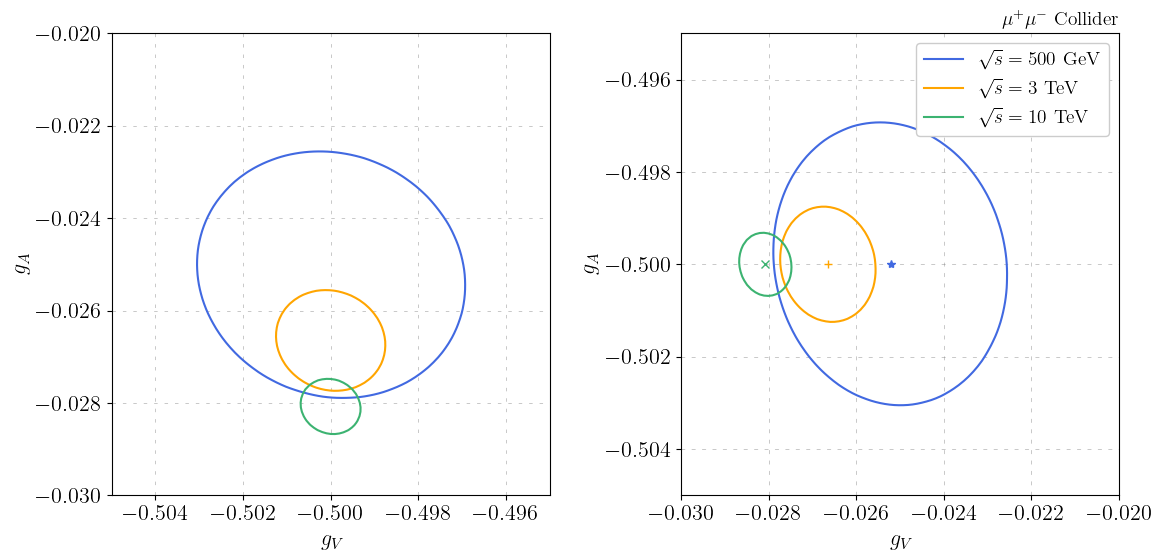

In [4]:
plot_gV_gA_2param(mndat_list=[mndat_MC_500GeV_2param,
                                mndat_MC_3TeV_2param,
                                mndat_MC_10TeV_2param],
                  slist=["500GeV", "3TeV", "10TeV"], plot_title=r"$\mu^+ \mu^-$ Collider",
                  label_list=[r"$\sqrt{s} = 500$ GeV", r"$\sqrt{s} = 3$ TeV", r"$\sqrt{s} = 10$ TeV"])

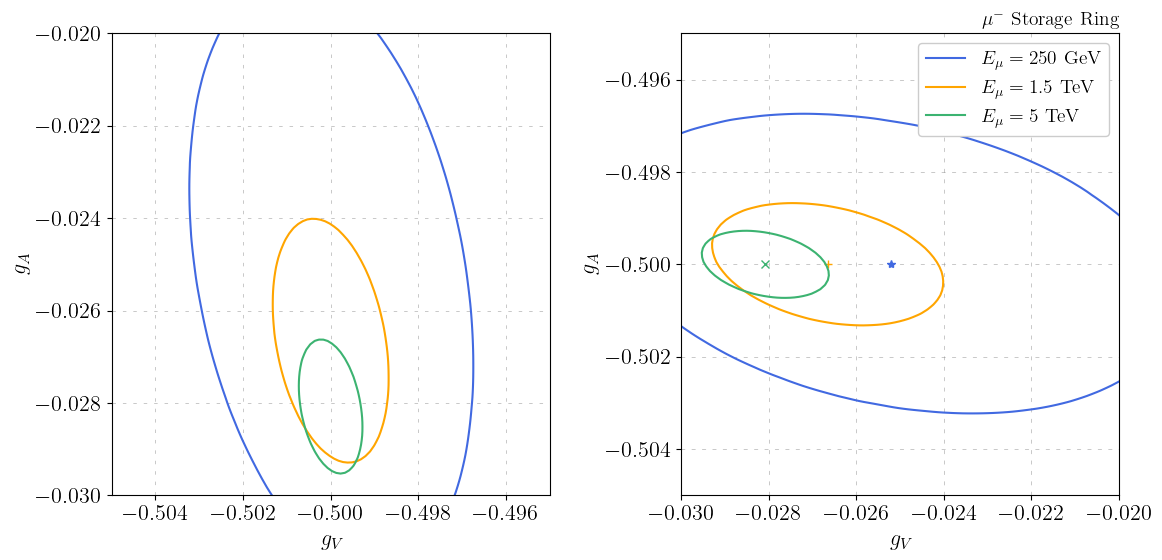

In [85]:
plot_gV_gA_2param(mndat_list=[mndat_SR_500GeV_2param,
                                mndat_SR_3TeV_2param,
                                mndat_SR_10TeV_2param],
                  slist=["500GeV", "3TeV", "10TeV"], plot_title=r"$\mu^-$ Storage Ring",
                  label_list=[r"$E_\mu = 250$ GeV", r"$E_\mu = 1.5$ TeV", r"$E_\mu = 5$ TeV"],
                  save_name="plots/VA_couplings/gV_gA_SR_benchmark_sensitivity.pdf")

### Combined SR + MC + Constraints Plot

In [30]:
# import existing limits
charm2_gv_ga = np.genfromtxt("limits/CHARM2_p1.txt")
texono_gv_ga = np.genfromtxt("limits/TEXONO_zoomed.txt")
lsnd_gv_ga = np.genfromtxt("limits/LSND_zoomed.txt")

In [65]:

from scipy.interpolate import griddata
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

fluxes_dict = {
    "500GeV": {
        "SSW": 0.23739130434782607  # at 0.24 GeV
    },
    "3TeV": {
        "SSW": 0.23667701863354035  # at 0.7 GeV
    },
    "10TeV": {
        "SSW": 0.23596273291925465  # at 1.5 GeV
    }
}

# Curtail the existing bounds
charm2_gV = np.append(charm2_gv_ga[:,0], charm2_gv_ga[0,0])
charm2_gA = np.append(charm2_gv_ga[:,1], charm2_gv_ga[0,1])



lsnd_line_lower = np.array([[-0.002640000000000031, -0.6016986706056132],
                            [-0.16872, -0.39874446085672083]])
lsnd_line_upper = np.array([[-0.005519999999999969, -0.3981536189069425],
                            [0.12648000000000004, -0.5650664697193503]])


tex_line_lower = np.array([[-0.13704, -0.6014032496307239],
                            [0.028560000000000085, -0.39933530280649937]])
tex_line_upper = np.array([[-0.016559999999999964, -0.6016986706056131],
                            [0.12552000000000008, -0.39785819793205335]])




def plot_gVgA_2param_MC_SR(mndat_list_mc, mndat_list_sr, slist, marker_list=["*", "+", "x"],
                        color_list=['royalblue', 'goldenrod', 'mediumseagreen'],
                        plot_title=r"$\mu^+ \mu^-$ Collider",
                        label_list=[r"$\sqrt{s} = 500$ GeV", r"$\sqrt{s} = 3$ TeV", r"$\sqrt{s} = 10$ TeV"],
                        save_name=None):

    # Begin plotting: Two quadrants
    fig, axes = plt.subplots(figsize=(10, 6))
    fig.subplots_adjust(hspace=0.05, wspace=0.3)

    handles, labels = plt.gca().get_legend_handles_labels()

    # Create the inset
    ax_inset = fig.add_axes([0.23, 0.21, 0.3, 0.35])  # [left, bottom, width, height]
    ax_inset_gV_range = [-0.035, -0.015]
    ax_inset_gA_range = [-0.505, -0.495]

    def plot_contours(mndat_list, ls="solid"):
        for i, mndat in enumerate(mndat_list):
            # Read in data
            g_L = mndat[:, 2]
            g_R = mndat[:, 3]
            deltaChi2 = mndat[:, 1]

            # Assign colors and alphas based on different contours
            colors = np.zeros_like(deltaChi2, dtype=object)
            colors[deltaChi2 < 2.3] = 'navy'
            colors[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)] = 'mediumseagreen'
            colors[deltaChi2 >= 6.18] = 'silver'

            alphas = np.zeros_like(deltaChi2, dtype=object)
            alphas[deltaChi2 < 2.3] = 0.5
            alphas[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)]  = 0.9
            alphas[deltaChi2 >= 6.18] = 0.0

            gV = (g_L + g_R)
            gA = (g_L - g_R)

            # SM point
            ax_inset.plot(-0.5 + 2*fluxes_dict[slist[i]]["SSW"], -0.5,
                        color=color_list[i], marker=marker_list[i])
            
            # Try with grid interp only in the specified range
            grid_x, grid_y = np.mgrid[ax_inset_gV_range[0]:ax_inset_gV_range[1]:5000j,
                                      ax_inset_gA_range[0]:ax_inset_gA_range[1]:5000j]
            grid_deltaChi2 = griddata((gV, gA), deltaChi2, (grid_x, grid_y), method='cubic')
            axes.contour(grid_x, grid_y, grid_deltaChi2, levels=[4.61], colors=color_list[i], linestyles=ls, linewidths=1.0)
            ax_inset.contour(grid_x, grid_y, grid_deltaChi2, levels=[4.61], colors=color_list[i], linestyles=ls, linewidths=1.0)

    # Plot the Muon Ring and Collider contours
    plot_contours(mndat_list_mc, ls='solid')
    plot_contours(mndat_list_sr, ls='dashed')
    
    # Legends
    for i in range(len(label_list)):
        line = Line2D([0], [0], label=label_list[i], color=color_list[i])
        handles.extend([line])

    # plot the existing bounds
    axes.plot(charm2_gV, charm2_gA, color="dimgray", linewidth=1.0)
    axes.plot(lsnd_line_lower[:,0], lsnd_line_lower[:,1], color='sienna', linewidth=1.0)
    axes.plot(lsnd_line_upper[:,0], lsnd_line_upper[:,1], color='sienna', linewidth=1.0)
    axes.plot(tex_line_lower[:,0], tex_line_lower[:,1], color='mediumpurple', linewidth=1.0)
    axes.plot(tex_line_upper[:,0], tex_line_upper[:,1], color='mediumpurple', linewidth=1.0)

    # labels
    axes.text(-0.135, -0.45, "LSND", rotation=-49.0, fontsize=16, color='sienna')
    axes.text(-0.03, -0.45, "TEXONO", rotation=49.5, fontsize=16, color='mediumpurple')
    axes.text(0.00, -0.48, "CHARM-II", fontsize=16, color='dimgray')

    ax_inset.plot([-0.0235, -0.021], [-0.496, -0.496], 'k-', linewidth=1)  # Solid line marker
    ax_inset.plot([-0.0235, -0.021], [-0.497, -0.497], 'k--', linewidth=1)  # Dashed line marker

    # Add text next to the drawn lines
    ax_inset.text(-0.020, -0.496, r"$\mu^+ \mu^-$ MC", fontsize=12, verticalalignment='center')
    ax_inset.text(-0.020, -0.497, r"$\mu^-$ SR", fontsize=12, verticalalignment='center')

    axes.tick_params(axis="x", labelsize=16)
    axes.tick_params(axis="y", labelsize=16)
    axes.tick_params(axis="x", labelsize=16)
    axes.tick_params(axis="y", labelsize=16)
    ax_inset.tick_params(axis="x", labelsize=14)
    ax_inset.tick_params(axis="y", labelsize=14)
    ax_inset.tick_params(axis="x", labelsize=14)
    ax_inset.tick_params(axis="y", labelsize=14)

    ax_inset.set_xlim(ax_inset_gV_range)
    ax_inset.set_ylim(ax_inset_gA_range)
    ax_inset.set_xlabel(r"$g_V$", fontsize=16)
    ax_inset.set_ylabel(r"$g_A$", fontsize=16)

    axes.set_xlim((-0.27, 0.07))
    axes.set_ylim((-0.6, -0.4))
    axes.set_xlabel(r"$g_V$", fontsize=16)
    axes.set_ylabel(r"$g_A$", fontsize=16)

    # Set the grids
    axes.grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))
    ax_inset.grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))

    for line in plt.gca().xaxis.get_gridlines():
        line.set_dash_capstyle('round')

    for line in plt.gca().yaxis.get_gridlines():
        line.set_dash_capstyle('round')

    # Draw the inset rect
    inset_corners = np.array([
        [0.23, 0.21],              # Bottom-left
        [0.23 + 0.3, 0.21],        # Bottom-right
        [0.23 + 0.3, 0.21 + 0.35], # Top-right
        [0.23, 0.21 + 0.35]        # Top-left
    ])

    # Convert figure coordinates to main axis data coordinates
    transformed_corners = axes.transAxes.inverted().transform(
        fig.transFigure.transform(inset_corners)
    )

    bottom_right = transformed_corners[1]  # Second row → Bottom-right corner
    top_right    = transformed_corners[2]  # Third row → Top-right corner

    inset_right_up = np.array([top_right,
                      [ax_inset_gV_range[0]+(ax_inset_gA_range[1]-ax_inset_gA_range[0]), ax_inset_gA_range[0]]])
    inset_right_down = np.array([bottom_right,
                        [ax_inset_gV_range[0], ax_inset_gA_range[0]]])
    print(inset_right_up)
    print(inset_right_down)
    rect = Rectangle((ax_inset_gV_range[0], ax_inset_gA_range[0]),
              ax_inset_gV_range[1]-ax_inset_gV_range[0],
              ax_inset_gA_range[1]-ax_inset_gA_range[0], color='silver', facecolor='none', alpha=0.5)
    axes.add_patch(rect)
    axes.plot(inset_right_up[:,0], inset_right_up[:,1], color='silver', alpha=0.5)
    axes.plot(inset_right_down[:,0], inset_right_down[:,1], color='silver', alpha=0.5)

    axes.legend(handles=handles, loc="upper left", framealpha=1, fontsize=14)

    
    plt.show()
    plt.tight_layout()
    if save_name is not None:
        fig.savefig(save_name)
    plt.close()


[[ 0.52258065  0.58441558]
 [-0.025      -0.505     ]]
[[ 0.52258065  0.12987013]
 [-0.035      -0.505     ]]


C:\Users\adria\AppData\Local\Temp\ipykernel_22828\1773445214.py:165: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = Rectangle((ax_inset_gV_range[0], ax_inset_gA_range[0]),


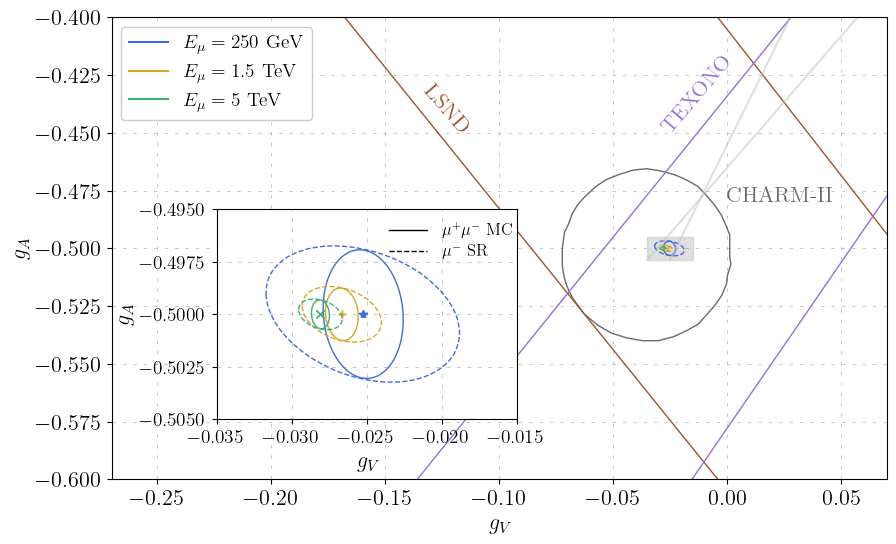

In [66]:
plot_gVgA_2param_MC_SR(mndat_list_sr=[mndat_SR_500GeV_2param,
                                mndat_SR_3TeV_2param,
                                mndat_SR_10TeV_2param],
                        mndat_list_mc=[mndat_MC_500GeV_2param,
                                mndat_MC_3TeV_2param,
                                mndat_MC_10TeV_2param],
                  slist=["500GeV", "3TeV", "10TeV"], plot_title=r"$\mu^-$ Storage Ring",
                  label_list=[r"$E_\mu = 250$ GeV", r"$E_\mu = 1.5$ TeV", r"$E_\mu = 5$ TeV"],
                  save_name="plots/VA_couplings/gV_gA_MC_SR_with_extLimits.pdf")

# Plotting Sensitivity to the Neutrino Couplings $g_\nu$

In [2]:
mndat_MC_500GeV_gnu = np.genfromtxt("multinest/Quest/MC_NUFLAV/sqrts-500GeV_MC_nuflavor_.txt")
mndat_MC_3TeV_gnu = np.genfromtxt("multinest/Quest/MC_NUFLAV/sqrts-3TeV_MC_nuflavor_.txt")
mndat_MC_10TeV_gnu = np.genfromtxt("multinest/Quest/MC_NUFLAV/sqrts-10TeV_MC_nuflavor_.txt")

mndat_SR_500GeV_gnu = np.genfromtxt("multinest/Quest/SR_NUFLAV/sqrts-500GeV_SR_nuflavor_.txt")
mndat_SR_3TeV_gnu = np.genfromtxt("multinest/Quest/SR_NUFLAV/sqrts-3TeV_SR_nuflavor_.txt")
mndat_SR_10TeV_gnu = np.genfromtxt("multinest/Quest/SR_NUFLAV/sqrts-10TeV_SR_nuflavor_.txt")

In [24]:
fluxes_dict = {
    "500GeV": {
        "SSW": 0.23739130434782607  # at 0.24 GeV
    },
    "3TeV": {
        "SSW": 0.23667701863354035  # at 0.7 GeV
    },
    "10TeV": {
        "SSW": 0.23596273291925465  # at 1.5 GeV
    }
}

from scipy.interpolate import griddata

from matplotlib.lines import Line2D

def plot_gnu_2param_full(mndat_list, slist, marker_list=["*", "+", "x"],
                        color_list=['royalblue', 'orange', 'mediumseagreen'],
                        plot_points=False, plot_title=r"$\mu^+ \mu^-$ Collider",
                        label_list=[r"$\sqrt{s} = 500$ GeV", r"$\sqrt{s} = 3$ TeV", r"$\sqrt{s} = 10$ TeV"],
                        save_name="plots/VA_couplings/gV_gA_MC_benchmark_sensitivity.pdf"):

    # Begin plotting: Two quadrants
    for i, mndat in enumerate(mndat_list):
        # Read in data
        gnu_e = mndat[:, 2]
        gnu_mu = mndat[:, 3]
        deltaChi2 = mndat[:, 1]

        # Assign colors and alphas based on different contours
        colors = np.zeros_like(deltaChi2, dtype=object)
        colors[deltaChi2 < 2.3] = 'navy'
        colors[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)] = 'mediumseagreen'
        colors[deltaChi2 >= 6.18] = 'silver'

        alphas = np.zeros_like(deltaChi2, dtype=object)
        alphas[deltaChi2 < 2.3] = 0.5
        alphas[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)]  = 0.9
        alphas[deltaChi2 >= 6.18] = 0.0

        plt.scatter(gnu_e, gnu_mu, c=colors, alpha=alphas, cmap='viridis', s=1)


    #axes[0].set_xlim((-0.505, -0.495))
    #axes[0].set_ylim((-0.03, -0.02))
    #plt.ylabel(r"$g_{\nu_\mu}$", fontsize=16)
    #plt.xlabel(r"$g__{\nu_e}$", fontsize=16)

    # Set the grids
    plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))

    for line in plt.gca().xaxis.get_gridlines():
        line.set_dash_capstyle('round')

    for line in plt.gca().yaxis.get_gridlines():
        line.set_dash_capstyle('round')

    plt.title(plot_title, loc="right", fontsize=14)
    #plt.legend(handles=handles, loc="upper right", framealpha=1, fontsize=14)
    
    plt.show()
    plt.tight_layout()
    plt.close()


def plot_gnu_2param(mc_dat_list, sr_dat_list, slist, marker_list=["*", "+", "x"],
                        color_list=['royalblue', 'orange', 'mediumseagreen'],
                        plot_points=False, plot_title=r"$\mu^+ \mu^-$ Collider",
                        label_list=[r"$\sqrt{s} = 500$ GeV", r"$\sqrt{s} = 3$ TeV", r"$\sqrt{s} = 10$ TeV"],
                        save_name="plots/VA_couplings/gV_gA_MC_benchmark_sensitivity.pdf"):

    # Begin plotting: Two quadrants
    fig, axes = plt.subplots(1, 2, figsize=(13, 6))
    fig.subplots_adjust(hspace=0.05, wspace=0.3)

    handles, labels = plt.gca().get_legend_handles_labels()

    for i, mndat in enumerate(sr_dat_list):
        # Read in data
        gnu_e = mndat[:, 2]
        gnu_mu = mndat[:, 3]
        deltaChi2 = mndat[:, 1]

        # Assign colors and alphas based on different contours
        colors = np.zeros_like(deltaChi2, dtype=object)
        colors[deltaChi2 < 2.3] = 'navy'
        colors[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)] = 'mediumseagreen'
        colors[deltaChi2 >= 6.18] = 'silver'

        alphas = np.zeros_like(deltaChi2, dtype=object)
        alphas[deltaChi2 < 2.3] = 0.5
        alphas[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)]  = 0.9
        alphas[deltaChi2 >= 6.18] = 0.0

        if plot_points:
            axes[0].scatter(gnu_e, gnu_mu, c=colors, alpha=alphas, cmap='viridis', s=1)
        
        axes[0].set_xlim((0.475, 0.525))
        axes[0].set_ylim((0.475, 0.525))
        axes[0].set_ylabel(r"$g_{\nu_\mu}$", fontsize=16)
        axes[0].set_xlabel(r"$g_{\nu_e}$", fontsize=16)

        # Try with grid interp
        grid_x, grid_y = np.mgrid[min(gnu_e):max(gnu_e):5000j, min(gnu_mu):max(gnu_mu):5000j]
        grid_deltaChi2 = griddata((gnu_e, gnu_mu), deltaChi2, (grid_x, grid_y), method='cubic')
        axes[0].contour(grid_x, grid_y, grid_deltaChi2, levels=[4.61], colors=color_list[i])

        if plot_points:    
            axes[0].scatter(gnu_e, gnu_mu, c=colors, alpha=alphas, cmap='viridis', s=1)
        
        axes[0].set_title(r"$\mu^-$ Storage Ring", loc="right", fontsize=14)

        #line = Line2D([0], [0], label=label_list[i], color=color_list[i])
        #handles.extend([line])
    
    for i, mndat in enumerate(mc_dat_list):
        # Read in data
        gnu_e = mndat[:, 2]
        gnu_mu = mndat[:, 3]
        deltaChi2 = mndat[:, 1]

        # Assign colors and alphas based on different contours
        colors = np.zeros_like(deltaChi2, dtype=object)
        colors[deltaChi2 < 2.3] = 'navy'
        colors[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)] = 'mediumseagreen'
        colors[deltaChi2 >= 6.18] = 'silver'

        alphas = np.zeros_like(deltaChi2, dtype=object)
        alphas[deltaChi2 < 2.3] = 0.5
        alphas[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)]  = 0.9
        alphas[deltaChi2 >= 6.18] = 0.0

        if plot_points:
            axes[0].scatter(gnu_e, gnu_mu, c=colors, alpha=alphas, cmap='viridis', s=1)
        
        axes[1].set_xlim((0.475, 0.525))
        axes[1].set_ylim((0.475, 0.525))
        axes[1].set_ylabel(r"$g_{\nu_\mu}$", fontsize=16)
        axes[1].set_xlabel(r"$g_{\nu_e}$", fontsize=16)

        # Try with grid interp
        grid_x, grid_y = np.mgrid[min(gnu_e):max(gnu_e):5000j, min(gnu_mu):max(gnu_mu):5000j]
        grid_deltaChi2 = griddata((gnu_e, gnu_mu), deltaChi2, (grid_x, grid_y), method='cubic')
        axes[1].contour(grid_x, grid_y, grid_deltaChi2, levels=[4.61], colors=color_list[i])

        if plot_points:    
            axes[1].scatter(gnu_e, gnu_mu, c=colors, alpha=alphas, cmap='viridis', s=1)

        line = Line2D([0], [0], label=label_list[i], color=color_list[i])
        handles.extend([line])

    axes[0].tick_params(axis="x", labelsize=16)
    axes[0].tick_params(axis="y", labelsize=16)
    axes[1].tick_params(axis="x", labelsize=16)
    axes[1].tick_params(axis="y", labelsize=16)

    # Set the grids
    axes[0].grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))
    axes[1].grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))

    for line in plt.gca().xaxis.get_gridlines():
        line.set_dash_capstyle('round')

    for line in plt.gca().yaxis.get_gridlines():
        line.set_dash_capstyle('round')

    axes[1].set_title(r"$\mu^+ \mu^-$ Collider", loc="right", fontsize=14)
    axes[1].legend(handles=handles, loc="upper right", framealpha=1, fontsize=14)

    
    plt.show()
    plt.tight_layout()
    fig.savefig(save_name)
    plt.close()

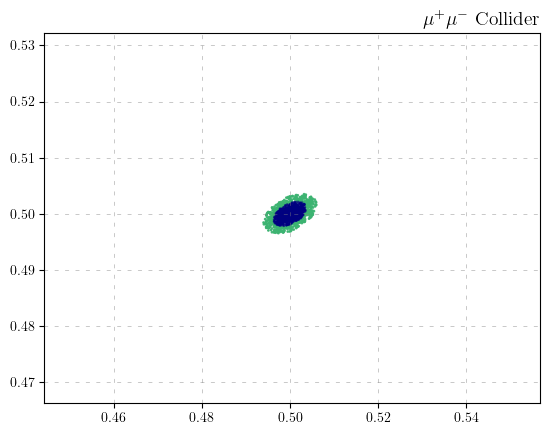

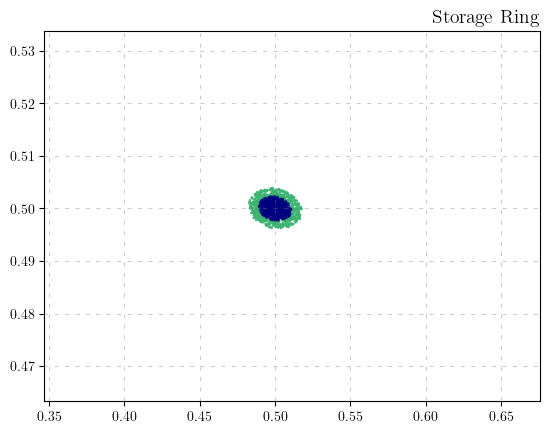

In [14]:
plot_gnu_2param_full(mndat_list=[mndat_MC_500GeV_gnu],
                  slist=["500GeV", "3TeV", "10TeV"], plot_title=r"$\mu^+ \mu^-$ Collider",
                  label_list=[r"$\sqrt{s} = 500$ GeV", r"$\sqrt{s} = 3$ TeV", r"$\sqrt{s} = 10$ TeV"])

plot_gnu_2param_full(mndat_list=[mndat_SR_500GeV_gnu],
                  slist=["500GeV", "3TeV", "10TeV"], plot_title=r"Storage Ring",
                  label_list=[r"$\sqrt{s} = 500$ GeV", r"$\sqrt{s} = 3$ TeV", r"$\sqrt{s} = 10$ TeV"])

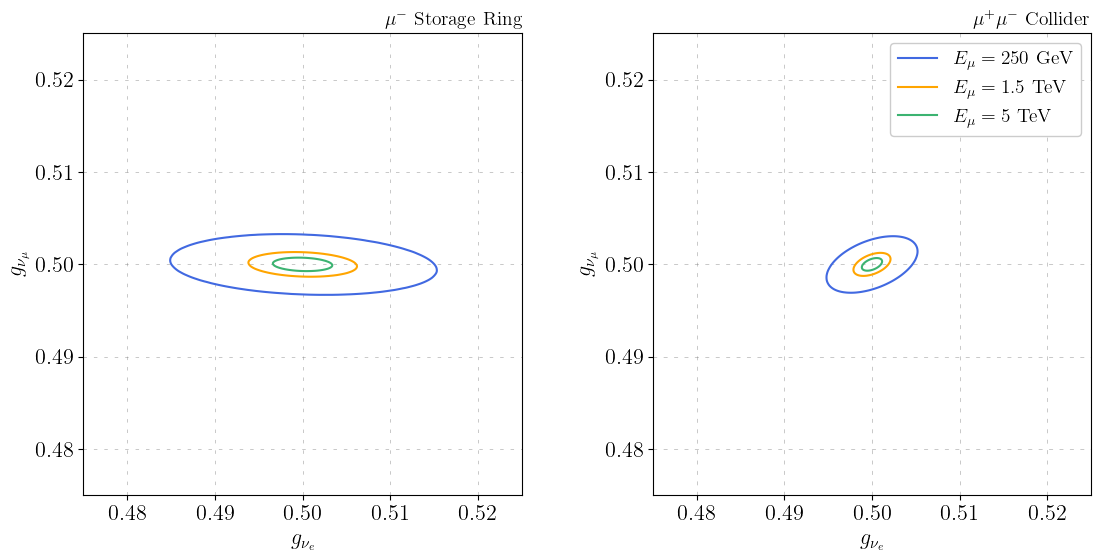

In [25]:
plot_gnu_2param(mc_dat_list=[mndat_MC_500GeV_gnu, mndat_MC_3TeV_gnu, mndat_MC_10TeV_gnu],
                sr_dat_list=[mndat_SR_500GeV_gnu, mndat_SR_3TeV_gnu, mndat_SR_10TeV_gnu],
                  slist=["500GeV", "3TeV", "10TeV"], plot_title=r"",
                  label_list=[r"$E_\mu = 250$ GeV", r"$E_\mu = 1.5$ TeV", r"$E_\mu = 5$ TeV"],
                  save_name="plots/VA_couplings/gnu_MC_SR_benchmark_sensitivity.pdf")

## Plotting 4 couplings: Multinest benchmarks

# Testing Sensitivity to the Running


### Set ```ssw_running=True``` in the below initializations

### 3 TeV

In [11]:
N_SAMPLES = 500

fluxes_dict = {
    "500GeV": {
        "SSW": 0.23739130434782607  # at 0.24 GeV
    },
    "3TeV": {
        "SSW": 0.23667701863354035  # at 0.7 GeV
    },
    "10TeV": {
        "SSW": 0.23596273291925465  # at 1.5 GeV
    }
}

# sqrt(s) = 3 TeV - WITH RUNNING
eves_gen_nuebar_3TeV_running = EvESFromNeutrinoFlux(nu_flux=nue_flux_3TeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True, energy_only_flux=True)
eves_gen_numu_3TeV_running = EvESFromNeutrinoFlux(nu_flux=numu_flux_3TeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True, energy_only_flux=True)
eves_gen_nuebar_3TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_3TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_3TeV_running, _, _, nuebar_wgts_3TeV_running = eves_gen_nuebar_3TeV_running.get_energy_theta_phi_wgt_arrays()
numu_energies_3TeV_running, _, _, numu_wgts_3TeV_running = eves_gen_numu_3TeV_running.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_3TeV_running = EvESFromNeutrinoFlux(nu_flux=nue_flux_3TeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True, energy_only_flux=True)
eves_gen_numubar_3TeV_running = EvESFromNeutrinoFlux(nu_flux=numu_flux_3TeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True, energy_only_flux=True)
eves_gen_nue_3TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numubar_3TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nue_energies_3TeV_running, _, _, nue_wgts_3TeV_running = eves_gen_nue_3TeV_running.get_energy_theta_phi_wgt_arrays()
numubar_energies_3TeV_running, _, _, numubar_wgts_3TeV_running = eves_gen_numubar_3TeV_running.get_energy_theta_phi_wgt_arrays()


# sqrt(s) = 3 TeV WITHOUT RUNNING
eves_gen_nuebar_3TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_3TeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=fluxes_dict['3TeV']['SSW'], ssw_running=False, energy_only_flux=True)
eves_gen_numu_3TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_3TeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=fluxes_dict['3TeV']['SSW'], ssw_running=False, energy_only_flux=True)
eves_gen_nuebar_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_3TeV, _, _, nuebar_wgts_3TeV = eves_gen_nuebar_3TeV.get_energy_theta_phi_wgt_arrays()
numu_energies_3TeV, _, _, numu_wgts_3TeV = eves_gen_numu_3TeV.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_3TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_3TeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=fluxes_dict['3TeV']['SSW'], ssw_running=False, energy_only_flux=True)
eves_gen_numubar_3TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_3TeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=fluxes_dict['3TeV']['SSW'], ssw_running=False, energy_only_flux=True)
eves_gen_nue_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numubar_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nue_energies_3TeV, _, _, nue_wgts_3TeV = eves_gen_nue_3TeV.get_energy_theta_phi_wgt_arrays()
numubar_energies_3TeV, _, _, numubar_wgts_3TeV = eves_gen_numubar_3TeV.get_energy_theta_phi_wgt_arrays()


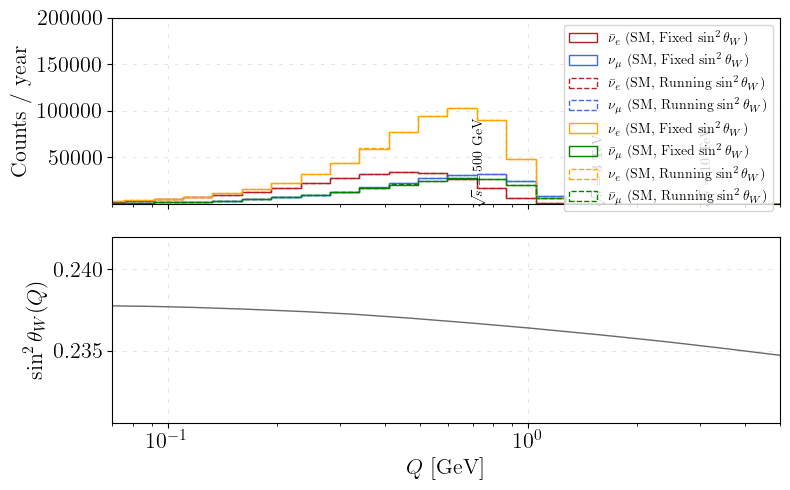

In [12]:
sw2_dat = np.genfromtxt("data/sw2_theory_curve_Q2.txt")
SSW_AT_1GEV = 0.23638198757763973


mucol_1sigma_sw2_vals = [SSW_AT_1GEV]
mucol_1sigma_Q2_vals = [1.0]
mucol_1sigma_Q2_err = [0.0004]

nuDIS = [5.0, 0.24, 0.00159]
E158 = [0.16, 0.2394, 0.00128]
APV = [2.35e-3, 0.2348, 0.002]

# Create the figure and set up the grid
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

q_bins = np.logspace(-3, 1, 50)

# Top panel: Recoil energy spectrum plot

ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_3TeV), weights=nuebar_wgts_3TeV, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_e$ (SM, Fixed $\sin^2 \theta_W$)", color='firebrick')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_3TeV), weights=numu_wgts_3TeV, bins=q_bins, histtype='step',
         label=r"$\nu_\mu$ (SM, Fixed $\sin^2 \theta_W$)", color='royalblue')

ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_3TeV_running), weights=nuebar_wgts_3TeV_running, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_e$ (SM, Running $\sin^2 \theta_W$)", color='firebrick', ls='dashed')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_3TeV_running), weights=numu_wgts_3TeV_running, bins=q_bins, histtype='step',
         label=r"$\nu_\mu$ (SM, Running $\sin^2 \theta_W$)", color='royalblue', ls='dashed')

ax1.hist(1e-3*sqrt(2*M_E*nue_energies_3TeV), weights=nue_wgts_3TeV, bins=q_bins, histtype='step',
         label=r"$\nu_e$ (SM, Fixed $\sin^2 \theta_W$)", color='orange')
ax1.hist(1e-3*sqrt(2*M_E*numubar_energies_3TeV), weights=numubar_wgts_3TeV, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_\mu$ (SM, Fixed $\sin^2 \theta_W$)", color='g')

ax1.hist(1e-3*sqrt(2*M_E*nue_energies_3TeV_running), weights=nue_wgts_3TeV_running, bins=q_bins, histtype='step',
         label=r"$\nu_e$ (SM, Running $\sin^2 \theta_W$)", color='orange', ls='dashed')
ax1.hist(1e-3*sqrt(2*M_E*numubar_energies_3TeV_running), weights=numubar_wgts_3TeV_running, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_\mu$ (SM, Running $\sin^2 \theta_W$)", color='g', ls='dashed')


#ax1.text(2e-3, 370000, r"E$\nu$ES from MC Neutrinos")

ax1.text(7e-1, 2e-1, r"$\sqrt{s}=500$ GeV", rotation=90.0)
ax1.text(1.5, 2e-1, r"$\sqrt{s}=3$ TeV", rotation=90.0)
ax1.text(3, 2e-1, r"$\sqrt{s}=10$ TeV", rotation=90.0)

ax1.legend(loc="upper right")


ax1.set_ylabel("Counts / year", fontsize=16)
ax1.set_xlim((q_bins[0], q_bins[-1]))
ax1.set_ylim((0.1, 2e5))
#ax1.set_yscale('log')

# Bottom panel: sin^2(theta) plot
ax2.plot(sw2_dat[:,0], sw2_dat[:,1], color='dimgray', linewidth=1.0)



ax2.set_xscale('log')
ax2.set_xlabel(r"$Q$ [GeV]", fontsize=16)
ax2.set_ylabel(r"$\sin^2 \theta_W (Q)$", fontsize=16)
ax2.set_ylim(top=0.242)
ax2.set_xlim((7e-2, 5e0))

ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)
ax2.tick_params(axis="x", labelsize=16)
ax2.tick_params(axis="y", labelsize=16)

# set the grid
ax1.grid(True, linestyle='-', linewidth=0.5, alpha=0.3, color='gray', dashes=(5,10))
ax2.grid(True, linestyle='-', linewidth=0.5, alpha=0.3, color='gray', dashes=(5,10))
for line in plt.gca().xaxis.get_gridlines():
    line.set_dash_capstyle('round')
for line in plt.gca().yaxis.get_gridlines():
    line.set_dash_capstyle('round')

# Final adjustments and save
plt.tight_layout()
#plt.savefig("plots/weak_mixing/EvES_spectra_by_COM_energy_vs_SSW_Running.pdf")
plt.show()

### 10 TeV

In [14]:
N_SAMPLES = 500

fluxes_dict = {
    "500GeV": {
        "SSW": 0.23739130434782607  # at 0.24 GeV
    },
    "10TeV": {
        "SSW": 0.23667701863354035  # at 0.7 GeV
    },
    "10TeV": {
        "SSW": 0.23596273291925465  # at 1.5 GeV
    }
}

# sqrt(s) = 10 TeV - WITH RUNNING
eves_gen_nuebar_10TeV_running = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True, energy_only_flux=True)
eves_gen_numu_10TeV_running = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True, energy_only_flux=True)
eves_gen_nuebar_10TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_10TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_10TeV_running, _, _, nuebar_wgts_10TeV_running = eves_gen_nuebar_10TeV_running.get_energy_theta_phi_wgt_arrays()
numu_energies_10TeV_running, _, _, numu_wgts_10TeV_running = eves_gen_numu_10TeV_running.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_10TeV_running = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True, energy_only_flux=True)
eves_gen_numubar_10TeV_running = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True, energy_only_flux=True)
eves_gen_nue_10TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numubar_10TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nue_energies_10TeV_running, _, _, nue_wgts_10TeV_running = eves_gen_nue_10TeV_running.get_energy_theta_phi_wgt_arrays()
numubar_energies_10TeV_running, _, _, numubar_wgts_10TeV_running = eves_gen_numubar_10TeV_running.get_energy_theta_phi_wgt_arrays()


# sqrt(s) = 10 TeV WITHOUT RUNNING
eves_gen_nuebar_10TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=fluxes_dict['10TeV']['SSW'], ssw_running=False, energy_only_flux=True)
eves_gen_numu_10TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=fluxes_dict['10TeV']['SSW'], ssw_running=False, energy_only_flux=True)
eves_gen_nuebar_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_10TeV, _, _, nuebar_wgts_10TeV = eves_gen_nuebar_10TeV.get_energy_theta_phi_wgt_arrays()
numu_energies_10TeV, _, _, numu_wgts_10TeV = eves_gen_numu_10TeV.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_10TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=fluxes_dict['10TeV']['SSW'], ssw_running=False, energy_only_flux=True)
eves_gen_numubar_10TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=fluxes_dict['10TeV']['SSW'], ssw_running=False, energy_only_flux=True)
eves_gen_nue_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numubar_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nue_energies_10TeV, _, _, nue_wgts_10TeV = eves_gen_nue_10TeV.get_energy_theta_phi_wgt_arrays()
numubar_energies_10TeV, _, _, numubar_wgts_10TeV = eves_gen_numubar_10TeV.get_energy_theta_phi_wgt_arrays()


C:\Users\adria\AppData\Local\Temp\ipykernel_25428\663873185.py:65: RuntimeWarning: invalid value encountered in divide
  ax2.plot(q_bin_centers, (h_nuebar-h_nuebar_run)/np.sqrt(h_nuebar), color='firebrick', linewidth=1.0)
C:\Users\adria\AppData\Local\Temp\ipykernel_25428\663873185.py:66: RuntimeWarning: invalid value encountered in divide
  ax2.plot(q_bin_centers, (h_numu-h_numu_run)/np.sqrt(h_numu), color='royalblue', linewidth=1.0)
C:\Users\adria\AppData\Local\Temp\ipykernel_25428\663873185.py:67: RuntimeWarning: invalid value encountered in divide
  ax2.plot(q_bin_centers, (h_nue-h_nue_run)/np.sqrt(h_nue), color='orange', linewidth=1.0)
C:\Users\adria\AppData\Local\Temp\ipykernel_25428\663873185.py:68: RuntimeWarning: invalid value encountered in divide
  ax2.plot(q_bin_centers, (h_numubar-h_numubar_run)/np.sqrt(h_numubar), color='g', linewidth=1.0)


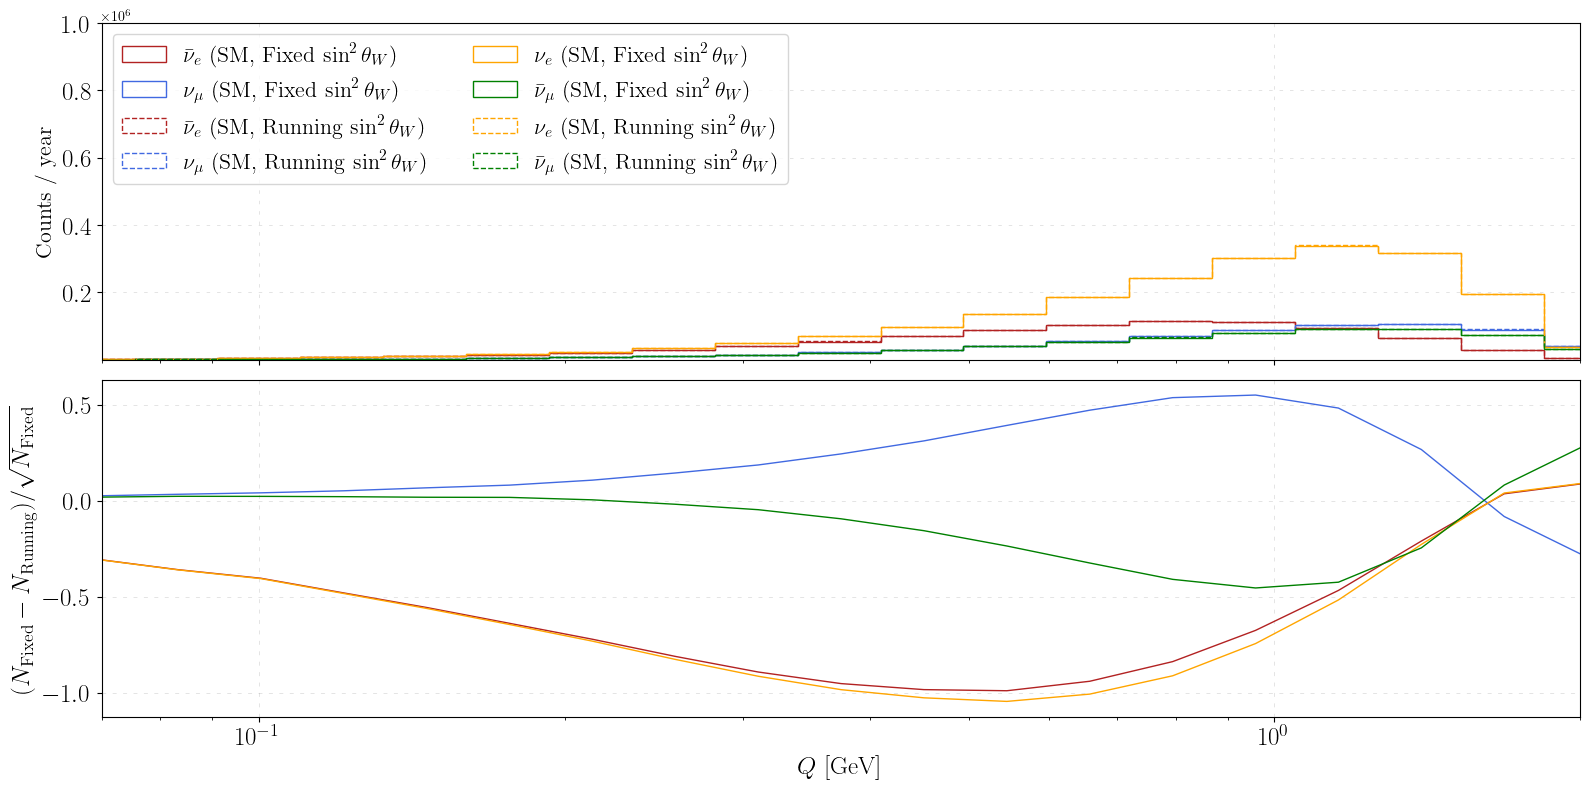

In [15]:
sw2_dat = np.genfromtxt("data/sw2_theory_curve_Q2.txt")
SSW_AT_1GEV = 0.23638198757763973


mucol_1sigma_sw2_vals = [SSW_AT_1GEV]
mucol_1sigma_Q2_vals = [1.0]
mucol_1sigma_Q2_err = [0.0004]

nuDIS = [5.0, 0.24, 0.00159]
E158 = [0.16, 0.2394, 0.00128]
APV = [2.35e-3, 0.2348, 0.002]

# Create the figure and set up the grid
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

q_bins = np.logspace(-3, 1, 50)
q_bin_centers = (q_bins[1:] + q_bins[:-1])/2

# Top panel: Recoil energy spectrum plot

ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_10TeV), weights=nuebar_wgts_10TeV, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_e$ (SM, Fixed $\sin^2 \theta_W$)", color='firebrick')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_10TeV), weights=numu_wgts_10TeV, bins=q_bins, histtype='step',
         label=r"$\nu_\mu$ (SM, Fixed $\sin^2 \theta_W$)", color='royalblue')

ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_10TeV_running), weights=nuebar_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_e$ (SM, Running $\sin^2 \theta_W$)", color='firebrick', ls='dashed')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_10TeV_running), weights=numu_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\nu_\mu$ (SM, Running $\sin^2 \theta_W$)", color='royalblue', ls='dashed')

ax1.hist(1e-3*sqrt(2*M_E*nue_energies_10TeV), weights=nue_wgts_10TeV, bins=q_bins, histtype='step',
         label=r"$\nu_e$ (SM, Fixed $\sin^2 \theta_W$)", color='orange')
ax1.hist(1e-3*sqrt(2*M_E*numubar_energies_10TeV), weights=numubar_wgts_10TeV, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_\mu$ (SM, Fixed $\sin^2 \theta_W$)", color='g')

ax1.hist(1e-3*sqrt(2*M_E*nue_energies_10TeV_running), weights=nue_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\nu_e$ (SM, Running $\sin^2 \theta_W$)", color='orange', ls='dashed')
ax1.hist(1e-3*sqrt(2*M_E*numubar_energies_10TeV_running), weights=numubar_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_\mu$ (SM, Running $\sin^2 \theta_W$)", color='g', ls='dashed')

#ax1.text(2e-3, 370000, r"E$\nu$ES from MC Neutrinos")
ax1.legend(loc="upper left", ncol=2, fontsize=16)

ax1.set_ylabel("Counts / year", fontsize=16)
ax1.set_xlim((q_bins[0], q_bins[-1]))
ax1.set_ylim((0.1, 1e6))
#ax1.set_yscale('log')

################################################################################################

# Bottom panel: subtraction

# Collect all diffs
h_nuebar, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_10TeV), weights=nuebar_wgts_10TeV, bins=q_bins)
h_nue, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_10TeV), weights=nue_wgts_10TeV, bins=q_bins)
h_numubar, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_10TeV), weights=numubar_wgts_10TeV, bins=q_bins)
h_numu, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_10TeV), weights=numu_wgts_10TeV, bins=q_bins)

h_nuebar_run, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_10TeV_running), weights=nuebar_wgts_10TeV_running, bins=q_bins)
h_nue_run, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_10TeV_running), weights=nue_wgts_10TeV_running, bins=q_bins)
h_numubar_run, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_10TeV_running), weights=numubar_wgts_10TeV_running, bins=q_bins)
h_numu_run, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_10TeV_running), weights=numu_wgts_10TeV_running, bins=q_bins)


ax2.plot(q_bin_centers, (h_nuebar-h_nuebar_run)/np.sqrt(h_nuebar), color='firebrick', linewidth=1.0)
ax2.plot(q_bin_centers, (h_numu-h_numu_run)/np.sqrt(h_numu), color='royalblue', linewidth=1.0)
ax2.plot(q_bin_centers, (h_nue-h_nue_run)/np.sqrt(h_nue), color='orange', linewidth=1.0)
ax2.plot(q_bin_centers, (h_numubar-h_numubar_run)/np.sqrt(h_numubar), color='g', linewidth=1.0)



ax2.set_xscale('log')
ax2.set_xlabel(r"$Q$ [GeV]", fontsize=18)
ax2.set_ylabel(r"$(N_{\rm Fixed} - N_{\rm Running}) / \sqrt{N_{\rm Fixed}}$", fontsize=18)
#ax2.set_ylim(top=0.242)
ax2.set_xlim((7e-2, 2))

ax1.tick_params(axis="x", labelsize=18)
ax1.tick_params(axis="y", labelsize=18)
ax2.tick_params(axis="x", labelsize=18)
ax2.tick_params(axis="y", labelsize=18)

# set the grid
ax1.grid(True, linestyle='-', linewidth=0.5, alpha=0.3, color='gray', dashes=(5,10))
ax2.grid(True, linestyle='-', linewidth=0.5, alpha=0.3, color='gray', dashes=(5,10))
for line in plt.gca().xaxis.get_gridlines():
    line.set_dash_capstyle('round')
for line in plt.gca().yaxis.get_gridlines():
    line.set_dash_capstyle('round')

# Final adjustments and save
plt.tight_layout()
plt.savefig("plots/weak_mixing/EvES_spectra_vs_SSW_Running_10TeV.pdf")
plt.show()

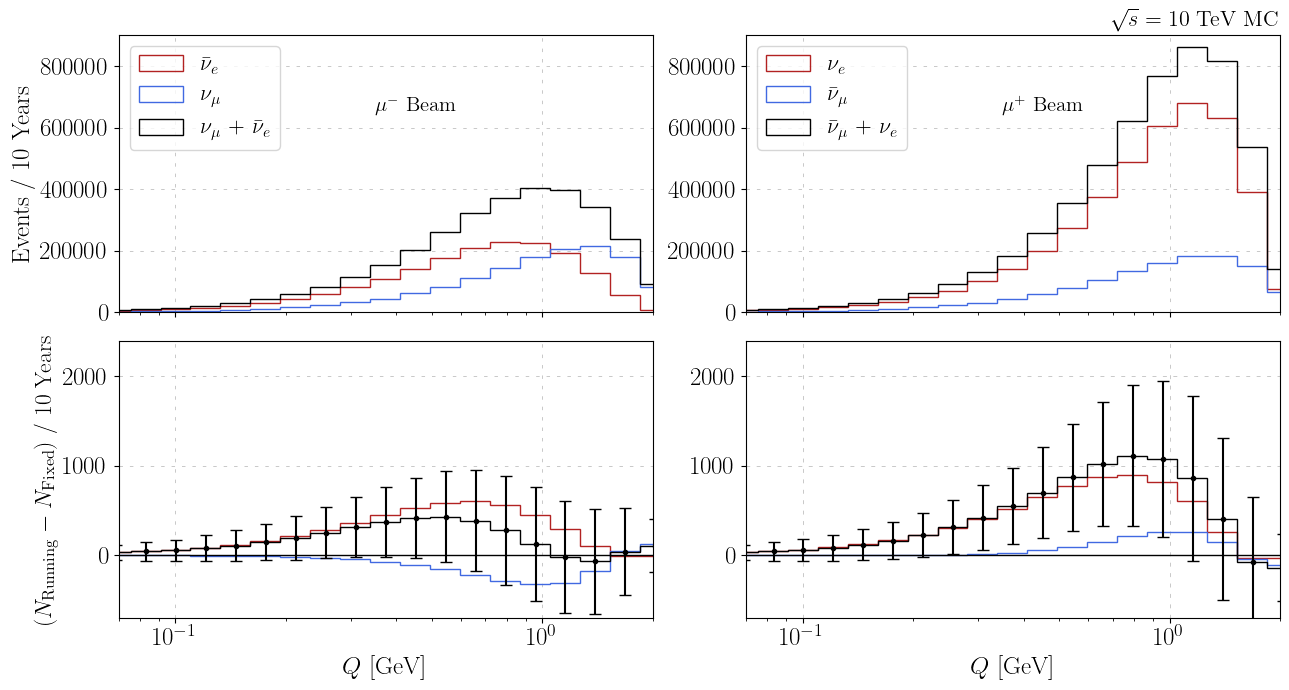

In [48]:
sw2_dat = np.genfromtxt("data/sw2_theory_curve_Q2.txt")
SSW_AT_1GEV = 0.23638198757763973


mucol_1sigma_sw2_vals = [SSW_AT_1GEV]
mucol_1sigma_Q2_vals = [1.0]
mucol_1sigma_Q2_err = [0.0004]

nuDIS = [5.0, 0.24, 0.00159]
E158 = [0.16, 0.2394, 0.00128]
APV = [2.35e-3, 0.2348, 0.002]

# Create the figure and set up the grid
fig, axes = plt.subplots(2, 2, figsize=(13, 7), sharex=True)

(axl, axr), (ax1, ax2) = axes

q_bins = np.logspace(-3, 1, 50)
q_bin_centers = (q_bins[1:] + q_bins[:-1])/2


# Collect all diffs
h_nuebar, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_10TeV), weights=nuebar_wgts_10TeV, bins=q_bins)
h_nue, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_10TeV), weights=nue_wgts_10TeV, bins=q_bins)
h_numubar, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_10TeV), weights=numubar_wgts_10TeV, bins=q_bins)
h_numu, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_10TeV), weights=numu_wgts_10TeV, bins=q_bins)

h_nuebar_run, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_10TeV_running), weights=nuebar_wgts_10TeV_running, bins=q_bins)
h_nue_run, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_10TeV_running), weights=nue_wgts_10TeV_running, bins=q_bins)
h_numubar_run, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_10TeV_running), weights=numubar_wgts_10TeV_running, bins=q_bins)
h_numu_run, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_10TeV_running), weights=numu_wgts_10TeV_running, bins=q_bins)

scale_factor = 2.0


# Absolute scale
axl.hist(q_bin_centers, weights=scale_factor*(h_nuebar_run), bins=q_bins, color='firebrick',
         histtype='step', label=r"$\bar{\nu}_e$")
axl.hist(q_bin_centers, weights=scale_factor*(h_numu_run), bins=q_bins,  color='royalblue',
         histtype='step', label=r"$\nu_\mu$")
axl.hist(q_bin_centers, weights=scale_factor*(h_numu_run + h_nuebar_run), bins=q_bins,  color='k',
         histtype='step', label=r"$\nu_\mu$ + $\bar{\nu}_e$")


# Plot the mu+ fluxes
axr.hist(q_bin_centers, weights=scale_factor*(h_nue_run), bins=q_bins, color='firebrick',
         histtype='step', label=r"$\nu_e$")
axr.hist(q_bin_centers, weights=scale_factor*(h_numubar_run), bins=q_bins, color='royalblue',
         histtype='step', label=r"$\bar{\nu}_\mu$")
axr.hist(q_bin_centers, weights=scale_factor*(h_numubar_run + h_nue_run), bins=q_bins, color='k',
         histtype='step', label=r"$\bar{\nu}_\mu$ + $\nu_e$")

axl.set_xscale('log')
axr.set_xscale('log')
axl.set_ylabel(r"Events / 10 Years", fontsize=18)
axr.set_xlim((7e-2, 2))
axl.set_xlim((7e-2, 2))
axr.set_ylim((0.0, 900000))
axl.set_ylim((0.0, 900000))

axr.tick_params(axis="x", labelsize=18)
axr.tick_params(axis="y", labelsize=18)
axl.tick_params(axis="x", labelsize=18)
axl.tick_params(axis="y", labelsize=18)

axl.text(0.35, 650000, r"$\mu^-$ Beam", fontsize=15)
axr.text(0.35, 650000, r"$\mu^+$ Beam", fontsize=15)



axl.legend(loc="upper left", fontsize=16)
axr.legend(loc="upper left", fontsize=16)
axr.set_title(r"$\sqrt{s} = 10$ TeV MC", fontsize=16, loc="right")

# DIFFS

# Plot the mu- fluxes
ax1.hist(q_bin_centers, weights=-scale_factor*(h_nuebar-h_nuebar_run), bins=q_bins, color='firebrick',
         histtype='step', label=r"$\bar{\nu}_e$")
ax1.hist(q_bin_centers, weights=-scale_factor*(h_numu-h_numu_run), bins=q_bins,  color='royalblue',
         histtype='step', label=r"$\nu_\mu$")
ax1.hist(q_bin_centers, weights=scale_factor*(h_numu_run + h_nuebar_run - h_numu - h_nuebar), bins=q_bins,  color='k',
         histtype='step', label=r"$\nu_\mu$ + $\bar{\nu}_e$")
ax1.errorbar(q_bin_centers, scale_factor*(h_numu_run + h_nuebar_run - h_numu - h_nuebar), yerr=np.sqrt(scale_factor*(h_nuebar_run + h_numu_run)),
             color='k', ls='none', capsize=4.0, marker='.')

# Plot the mu+ fluxes
ax2.hist(q_bin_centers, weights=-scale_factor*(h_nue-h_nue_run), bins=q_bins, color='firebrick',
         histtype='step', label=r"$\nu_e$")
ax2.hist(q_bin_centers, weights=-scale_factor*(h_numubar-h_numubar_run), bins=q_bins, color='royalblue',
         histtype='step', label=r"$\bar{\nu}_\mu$")
ax2.hist(q_bin_centers, weights=scale_factor*(h_numubar_run + h_nue_run - h_numubar - h_nue), bins=q_bins, color='k',
         histtype='step', label=r"$\bar{\nu}_\mu$ + $\nu_e$")
ax2.errorbar(q_bin_centers, scale_factor*(h_numubar_run + h_nue_run - h_numubar - h_nue), yerr=np.sqrt(scale_factor*(h_numubar_run + h_nue_run)),
             color='k', ls='none', capsize=4.0, marker='.')

ax1.hlines(0.0, 7e-2, 2, color='k', linewidth=1.0)
ax2.hlines(0.0, 7e-2, 2, color='k', linewidth=1.0)

ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel(r"$Q$ [GeV]", fontsize=18)
ax2.set_xlabel(r"$Q$ [GeV]", fontsize=18)
ax1.set_ylabel(r"$(N_{\rm Running} - N_{\rm Fixed})$ / 10 Years", fontsize=17)
ax1.set_ylim((-700.0, scale_factor*1200.0))
ax2.set_ylim((-700.0, scale_factor*1200.0))
ax2.set_xlim((7e-2, 2))
ax1.set_xlim((7e-2, 2))

ax2.tick_params(axis="x", labelsize=18)
ax2.tick_params(axis="y", labelsize=18)
ax1.tick_params(axis="x", labelsize=18)
ax1.tick_params(axis="y", labelsize=18)


# set the grid
ax1.grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))
ax2.grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))
axl.grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))
axr.grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))
for line in plt.gca().xaxis.get_gridlines():
    line.set_dash_capstyle('round')
for line in plt.gca().yaxis.get_gridlines():
    line.set_dash_capstyle('round')

# Final adjustments and save
fig.subplots_adjust(hspace=-0.5, wspace=0.1)  # Adjust these values as needed

plt.tight_layout()
plt.savefig("plots/weak_mixing/EvES_spectra_subtracted_SSW_Running_10TeV.pdf")
plt.show()

### $\chi^2$ analysis of the running + pseudoexperiments

In [15]:
from scipy.stats import chi2

from scipy.special import gammaln

def log_pois(data, bkg, signal):
    return -2*np.sum(data * np.log(signal + bkg) - (signal + bkg) - gammaln(data + 1))


In [ ]:
np.where(h_numubar >= 10)


(array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40]),)

In [43]:
print(h_numubar[15:-7])

ndof_sw_running = h_numubar[16:-8].shape[0]

[8.51536912e+00 1.51266596e+01 3.13734817e+01 8.00921601e+01
 1.39860973e+02 2.88931913e+02 6.95342876e+02 1.13601308e+03
 2.31980478e+03 2.77358675e+03 3.82353089e+03 6.13481379e+03
 8.04668342e+03 1.25748521e+04 1.69314020e+04 2.38929547e+04
 3.40327975e+04 4.60207197e+04 6.23320485e+04 8.16946246e+04
 1.03928883e+05 1.25584512e+05 1.42060499e+05 1.42735624e+05
 1.15995078e+05 5.16569251e+04 0.00000000e+00]


Trim the first 16 bins and last 8

In [81]:

chi2_nuebar = np.sum((h_nuebar[16:-8]-h_nuebar_run[16:-8])**2 / (h_nuebar_run[16:-8] + 1))
chi2_numu = np.sum((h_numu[16:-8]-h_numu_run[16:-8])**2 / (h_numu_run[16:-8] + 1))
chi2_nue = np.sum((h_nue[16:-8]-h_nue_run[16:-8])**2 / (h_nue_run[16:-8] + 1))
chi2_numubar = np.sum((h_numubar[16:-8]-h_numubar_run[16:-8])**2 / (h_numubar_run[16:-8] + 1))

ndof_mu_plus = (h_nue[16:-8].shape[0] + h_numubar[16:-8].shape[0])
ndof_mu_minus = (h_nuebar[16:-8].shape[0] + h_numu[16:-8].shape[0])

print("chi2 nuebar = {}, chi2_numu = {}, sum / dof = {}".format(chi2_nuebar, chi2_numu, (chi2_nuebar + chi2_numu)/ndof_sw_running/2))
print("chi2 nue = {}, chi2_numubar = {}, sum / dof = {}".format(chi2_nue, chi2_numubar, (chi2_nue + chi2_numubar)/ndof_sw_running/2))


crit_chi2_mu_plus = chi2.ppf(0.9, 2*ndof_sw_running)
crit_chi2_mu_minus = chi2.ppf(0.9, 2*ndof_sw_running)

print("crit chi^2 mu+ = {} vs. {}".format(crit_chi2_mu_plus, (chi2_nue + chi2_numubar)))

print("crit chi^2 mu- = {} vs. {}".format(crit_chi2_mu_minus, (chi2_nuebar + chi2_numu)))

print("N sigma for mu- mode = {}".format(chi2.cdf(chi2_nuebar + chi2_numu, 2*ndof_sw_running)))
print("N sigma for mu- mode = {}".format(chi2.cdf(chi2_nue + chi2_numubar, 2*ndof_sw_running)))

chi2 nuebar = 13.44273910543452, chi2_numu = 2.5139619713305335, sum / dof = 0.31913402153530107
chi2 nue = 14.658662969695106, chi2_numubar = 1.427405236350646, sum / dof = 0.32172136412091507
crit chi^2 mu+ = 63.167121005726315 vs. 16.086068206045752
crit chi^2 mu- = 63.167121005726315 vs. 15.956701076765054
N sigma for mu- mode = 1.1180978284763176e-06
N sigma for mu- mode = 1.286925372266554e-06


In [78]:

lp_nuebar = log_pois(h_nuebar_run[3:-8], 0.0, h_nuebar[3:-8])
lp_numu = log_pois(h_numu_run[3:-8], 0.0, h_numu[3:-8])
lp_nue = log_pois(h_nue_run[3:-8], 0.0, h_nue[3:-8])
lp_numubar = log_pois(h_numubar_run[3:-8], 0.0, h_numubar[3:-8])

print("chi2 nuebar = {}, chi2_numu = {}, sum / dof = {}".format(lp_nuebar, lp_numu, (lp_nuebar + lp_numu)))
print("chi2 nue = {}, chi2_numubar = {}, sum / dof = {}".format(lp_nue, lp_numubar, (lp_nue + lp_numubar)))


crit_chi2_mu_plus = chi2.ppf(0.9, ndof_mu_plus)
crit_chi2_mu_minus = chi2.ppf(0.9, ndof_mu_minus)

print("crit chi^2 mu+ = {} vs. {}".format(crit_chi2_mu_plus, (lp_nue + lp_numubar)))

print("crit chi^2 mu- = {} vs. {}".format(crit_chi2_mu_minus, (lp_nuebar + lp_numu)))


print("N sigma for mu- mode = {}".format(chi2.cdf(lp_nuebar + lp_numu, 2*ndof_mu_minus)))
print("N sigma for mu- mode = {}".format(chi2.cdf(lp_nue + lp_numubar, 2*ndof_mu_plus)))

chi2 nuebar = 320.32036477181776, chi2_numu = 282.4298561769111, sum / dof = 602.7502209487288
chi2 nue = 332.67782635539174, chi2_numubar = 280.2240836345402, sum / dof = 612.9019099899319
crit chi^2 mu+ = 63.167121005726315 vs. 612.9019099899319
crit chi^2 mu- = 63.167121005726315 vs. 602.7502209487288
N sigma for mu- mode = 1.0
N sigma for mu- mode = 1.0


### Pseudoexperiments

335.0739251702307


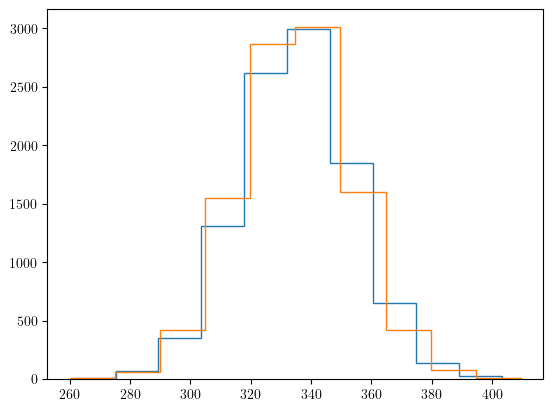

In [ ]:
from scipy.stats import norm

nuebar_pdata = norm.rvs(loc=h_nuebar_run[18:19], scale=np.sqrt(h_nuebar_run[18:19]), size=(10000, 2))
print(h_nuebar_run[18])

plt.hist(nuebar_pdata[:,0], histtype='step')
plt.hist(nuebar_pdata[:,1], histtype='step')
plt.show()


(100000,)
104.64471319328351
17.43854171978299
130.7167354445865
22.25964321372587


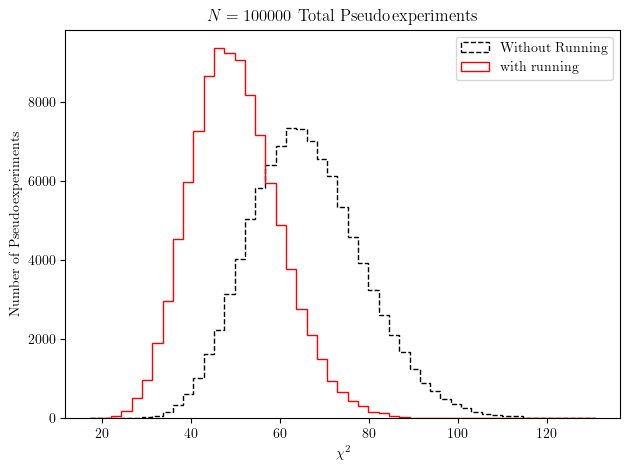

Median for no running =  65.28762798422979
Median for running hyp =  49.35107746946276
90% quantile for running hyp =  63.167121005726315


In [77]:
from scipy.stats import norm

# run 10,000 pseudoexperiments
nuebar_pdata = norm.rvs(loc=h_nuebar_run[16:-8], scale=np.sqrt(h_nuebar_run[16:-8]), size=(100000, ndof_sw_running))
numu_pdata = norm.rvs(loc=h_numu_run[16:-8], scale=np.sqrt(h_numu_run[16:-8]), size=(100000, ndof_sw_running))

chi2_pdata_norunning = np.sum(np.power(h_numu[16:-8] - numu_pdata, 2)/h_numu[16:-8], axis=1) \
    + np.sum(np.power(h_nuebar[16:-8] - nuebar_pdata, 2)/h_nuebar[16:-8], axis=1)
chi2_pdata_running = np.sum(np.power(h_numu_run[16:-8] - numu_pdata, 2)/h_numu_run[16:-8], axis=1) \
    + np.sum(np.power(h_nuebar_run[16:-8] - nuebar_pdata, 2)/h_nuebar_run[16:-8], axis=1)

print(chi2_pdata_norunning.shape)

print(max(chi2_pdata_running))
print(min(chi2_pdata_running))

print(max(chi2_pdata_norunning))
print(min(chi2_pdata_norunning))

chi2_bins = np.linspace(min(chi2_pdata_running), max(chi2_pdata_norunning), 50)


plt.hist(chi2_pdata_norunning, bins=chi2_bins, label="Without Running", color='k', histtype='step', ls='dashed')
plt.hist(chi2_pdata_running, bins=chi2_bins, label="with running", color='r', histtype='step')
plt.legend()
plt.xlabel(r"$\chi^2$")
plt.ylabel("Number of Pseudoexperiments")
plt.title(r"$N = 100000$ Total Pseudoexperiments")
plt.tight_layout()
plt.show()

median_running = np.median(chi2_pdata_running)
median_norunning = np.median(chi2_pdata_norunning)

print("Median for no running = ", median_norunning)
print("Median for running hyp = ", median_running)

print("90% quantile for running hyp = ", chi2.ppf(0.9, 2*ndof_sw_running))
